# Business Understanding 
---

# Data Understanding

| Column Name                     | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| Customer                        | Unique identifier for each customer                                         |
| State                           | State where the customer resides                                            |
| Customer Lifetime Value         | Estimated total revenue from the customer over their entire relationship    |
| Response                        | Customer's response to a marketing offer (Yes/No)                           |
| Coverage                        | Type of insurance coverage the customer has (e.g., Basic, Extended)         |
| Education                       | Highest level of education attained by the customer                         |
| Effective To Date               | Date when the insurance policy becomes effective                            |
| Employment Status               | Employment status of the customer (e.g., Employed, Unemployed, Retired)     |
| Gender                          | Gender of the customer (Male/Female)                                        |
| Income                          | Annual income of the customer                                               |
| Location Code                   | Code representing the type of location (e.g., Urban, Suburban, Rural)       |
| Marital Status                  | Marital status of the customer (e.g., Single, Married, Divorced)            |
| Monthly Premium Auto            | Monthly premium amount for the customer's auto insurance                    |
| Months Since Last Claim         | Number of months since the customer last filed a claim                      |
| Months Since Policy Inception   | Number of months since the policy was first initiated                       |
| Number of Open Complaints       | Number of open complaints the customer has with the insurance company       |
| Number of Policies              | Number of insurance policies the customer holds                             |
| Policy Type                     | Type of policy held by the customer (e.g., Corporate, Personal)             |
| Policy                          | Specific policy the customer has                                            |
| Renew Offer Type                | Type of renewal offer made to the customer (e.g., Offer1, Offer2)           |
| Sales Channel                   | Channel through which the policy was sold (e.g., Online, Agent)             |
| Total Claim Amount              | Total amount claimed by the customer                                        |
| Vehicle Class                   | Class of the vehicle insured (e.g., Sedan, SUV)                             |
| Vehicle Size                    | Size of the vehicle insured (e.g., Small, Medium, Large)                    |


In [208]:
# Importing all the libraries 

# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, make_scorer, mean_absolute_error, mean_squared_error

# Regression models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

# Utilities and Miscellaneous
import time
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [209]:
# read dataset 
df = pd.read_csv('new_dataset.csv')
df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,YQ79307,Washington,No,Basic,Bachelor,10/1/2011,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924
1,CY49953,Oregon,No,Extended,College,2/18/11,Unemployed,F,0,Suburban,Single,79,30,25,0,1,Special Auto,Special L2,Offer3,Branch,568.800000,Four-Door Car,Medsize,2827.559570
2,XN16891,Arizona,No,Basic,College,2/28/11,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035
3,EP64069,California,No,Basic,Bachelor,8/1/2011,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998
4,IW77519,Washington,No,Basic,Bachelor,1/18/11,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7302,FX81675,California,No,Basic,College,1/29/11,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083
7303,ZU30804,California,Yes,Basic,College,5/2/2011,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679
7304,LA53648,California,No,Extended,High School or Below,1/27/11,Unemployed,F,0,Suburban,Single,129,13,4,0,7,Personal Auto,Personal L1,Offer1,Call Center,1059.572464,SUV,Medsize,8992.779137
7305,IS30295,Arizona,Yes,Extended,Bachelor,2/27/11,Unemployed,F,0,Suburban,Divorced,139,5,56,0,2,Personal Auto,Personal L3,Offer1,Call Center,667.200000,SUV,Medsize,14635.451580


In [210]:
# show data columns 
df.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Customer Lifetime Value'],
      dtype='object')

In [211]:
# show data informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7307 entries, 0 to 7306
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       7307 non-null   object 
 1   State                          7307 non-null   object 
 2   Response                       7307 non-null   object 
 3   Coverage                       7307 non-null   object 
 4   Education                      7307 non-null   object 
 5   Effective To Date              7307 non-null   object 
 6   EmploymentStatus               7307 non-null   object 
 7   Gender                         7307 non-null   object 
 8   Income                         7307 non-null   int64  
 9   Location Code                  7307 non-null   object 
 10  Marital Status                 7307 non-null   object 
 11  Monthly Premium Auto           7307 non-null   int64  
 12  Months Since Last Claim        7307 non-null   i

In [212]:
# defining numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()

In [213]:
# show data summary 
df_summary = pd.DataFrame({
    'columns' : df.columns, 
    'data type' : df.dtypes.values, 
    'n unique' : df.nunique(), 
    'unique sample' : [df[col].unique() for col in df.columns]
})
pd.set_option('display.max_colwidth', None)
df_summary

,columns,data type,n unique,unique sample
Customer,Customer,object,7307,"[YQ79307, CY49953, XN16891, EP64069, IW77519, SI88726, NL59519, WW63253, WM64930, KZ95954, CA70404, GN76399, KC11055, LD26428, EI17022, UQ41461, TN79733, UR42360, PM63319, LN62857, MU64306, LR37068, HV75193, FX67699, FG31425, VO29645, LG45849, ZQ22116, PY70169, IB87349, WE80653, XG44587, DC46685, UI73924, FI93397, MC48570, LJ20215, JA34909, HG83893, LZ84227, UD31660, VE47660, KU88219, YY63521, AZ62651, CF95802, RA87395, KN13494, GY88677, SA91515, YN69214, LF94873, UR40795, ED29955, OQ99704, BG30513, DP23630, AT52647, IW21434, JK74110, AS78838, VH43367, FC59209, ML38237, UT76436, GD17919, MR84659, LD20926, QH62059, FR81224, BN38134, LD22387, ED90879, WE64781, KJ72146, CO91673, KY33386, OE19653, IJ33473, OU78642, YE45848, XB77333, MU79385, No34698, LC12930, IV54766, TN29644, EP18940, CY18875, BO81145, PU18983, KC69320, VB23257, ZW32080, ZR88383, FX55923, EZ85603, IJ98317, ZF84449, FJ31683, ...]"
State,State,object,5,"[Washington, Oregon, Arizona, California, Nevada]"
Response,Response,object,2,"[No, Yes]"
Coverage,Coverage,object,3,"[Basic, Extended, Premium]"
Education,Education,object,5,"[Bachelor, College, High School or Below, Master, Doctor]"
Effective To Date,Effective To Date,object,59,"[10/1/2011, 2/18/11, 2/28/11, 8/1/2011, 1/18/11, 1/19/11, 2/14/11, 1/20/11, 8/2/2011, 2/2/2011, 4/2/2011, 6/2/2011, 1/24/11, 5/2/2011, 1/27/11, 1/17/11, 2/22/11, 7/2/2011, 2/21/11, 2/26/11, 1/16/11, 2/24/11, 2/25/11, 3/2/2011, 1/31/11, 1/26/11, 2/1/2011, 1/23/11, 11/2/2011, 1/13/11, 2/19/11, 2/17/11, 10/2/2011, 1/29/11, 1/28/11, 1/14/11, 2/23/11, 5/1/2011, 1/15/11, 1/2/2011, 12/2/2011, 9/2/2011, 9/1/2011, 7/1/2011, 2/27/11, 11/1/2011, 2/20/11, 1/1/2011, 6/1/2011, 4/1/2011, 1/22/11, 1/30/11, 2/15/11, 1/25/11, 2/16/11, 1/21/11, 3/1/2011, 2/13/11, 12/1/2011]"
EmploymentStatus,EmploymentStatus,object,5,"[Employed, Unemployed, Medical Leave, Retired, Disabled]"
Gender,Gender,object,2,"[M, F]"
Income,Income,int64,4652,"[51144, 0, 81097, 72264, 54737, 38898, 64642, 12811, 62455, 39411, 14973, 27538, 35095, 23749, 57074, 35773, 26924, 37811, 12430, 27985, 73102, 93011, 70340, 88997, 25370, 55257, 18661, 17576, 59183, 95715, 70129, 30004, 25816, 20396, 56855, 97131, 46268, 27849, 61542, 52801, 13663, 44940, 98333, 29735, 61402, 55910, 35482, 89205, 39428, 53078, 20757, 93836, 30895, 29031, 81568, 87421, 60944, 80055, 22705, 67018, 21723, 21450, 28582, 47590, 37803, 55350, 50405, 86448, 43793, 22828, 53093, 39161, 23170, 66676, 20836, 24702, 26129, 12940, 14072, 39035, 23706, 99816, 14616, 19030, 27978, 33252, 28559, 29462, 71176, 44988, 41154, 60909, 73054, 59853, 28919, 83208, 21189, 31177, 23665, 91193, ...]"
Location Code,Location Code,object,3,"[Urban, Suburban, Rural]"


Explanation of each type of policy 

1. **Personal Auto**: This policy is designed for individuals to protect their private vehicles used for everyday purposes. It typically covers damage to the vehicle, accidents, theft and liability for injury to third parties or damage to property. It provides basic protection for private cars against various risks associated with regular use.

2. **Corporate Auto**: This policy is for vehicles owned and operated by a company or organisation. It is often more comprehensive than personal insurance, covering risks associated with multiple drivers and business use of the vehicles. It provides comprehensive protection for company fleets and the unique risks associated with business use.

3. **Special Auto**: This policy is designed for vehicles with specific needs or characteristics, such as classic cars, luxury vehicles or those with unique modifications. It provides tailored cover to meet the special requirements of these vehicles, offering protection that standard policies may not cover, such as high value losses or specialised repairs.

- L1: Basic protection.
- L2: Mid-level protection with add-ons.
- L3: High-level cover with the most comprehensive coverage.

Corporate auto insurance premiums tend to be higher than personal auto insurance premiums. This is because corporate policies typically cover a broader range of risks and more vehicles, which can include high-value vehicles, and may involve multiple drivers with varying levels of driving experience. Additionally, corporate vehicles are often on the road more frequently, which increases the likelihood of accidents and claims. These factors contribute to higher insurance costs for corporate policies compared to personal auto insurance.

In 2024, auto insurance premiums have been rising overall due to various factors, including increased vehicle repair costs, higher accident rates, and inflation. However, the exact difference between corporate and personal auto insurance can vary depending on the specific coverage, the size of the fleet, and the type of vehicles insured https://money.com/car-insurance-prices-2024-predictions/



In [214]:
# show descriptive analytics data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,7307.0,37517.762556,30192.253906,0.000000,0.000000,33806.000000,61796.000000,99981.000000
Monthly Premium Auto,7307.0,93.562748,34.679436,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,7307.0,15.082660,10.104234,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,7307.0,47.958533,27.979702,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,7307.0,0.380047,0.911466,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,7307.0,2.988230,2.400925,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,7307.0,437.157904,292.512144,0.099007,275.345717,384.000000,552.000000,2893.239678
Customer Lifetime Value,7307.0,8022.789394,6791.672803,1898.007675,4061.273191,5821.787383,9007.014951,83325.381190


# Data Cleaning

## 1. Duplicated Data

In [215]:
# counting duplicated data 
df.duplicated().sum()

0

In [216]:
# showing duplicated dataframe
df[df.duplicated()]

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value


In [217]:
# checking duplicates without column customer 
check_dups = df.columns[1:].to_list()
dups = df.duplicated(subset=check_dups, keep=False)
dups_rows = df[dups].sort_values(by=check_dups)

# showing all duplicated rows 
dups_rows

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
276,PD66941,Arizona,Yes,Basic,Bachelor,2/1/2011,Retired,M,17622,Suburban,Divorced,65,1,36,1,3,Personal Auto,Personal L3,Offer1,Agent,312.0,Four-Door Car,Medsize,4458.113369
6372,OB49075,Arizona,Yes,Basic,Bachelor,2/1/2011,Retired,M,17622,Suburban,Divorced,65,1,36,1,3,Personal Auto,Personal L3,Offer1,Agent,312.0,Four-Door Car,Medsize,4458.113369
1710,IS63925,Arizona,Yes,Basic,College,1/27/11,Retired,F,21073,Suburban,Divorced,106,25,54,1,3,Personal Auto,Personal L2,Offer1,Agent,508.8,SUV,Small,7805.312870
5836,CS93971,Arizona,Yes,Basic,College,1/27/11,Retired,F,21073,Suburban,Divorced,106,25,54,1,3,Personal Auto,Personal L2,Offer1,Agent,508.8,SUV,Small,7805.312870
5098,VU99589,Arizona,Yes,Basic,High School or Below,1/14/11,Employed,F,20090,Suburban,Married,109,10,59,0,2,Personal Auto,Personal L3,Offer2,Agent,523.2,Sports Car,Medsize,34611.378960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7040,WT86597,Oregon,Yes,Extended,Master,1/31/11,Unemployed,M,0,Suburban,Single,125,6,61,0,2,Personal Auto,Personal L3,Offer1,Agent,900.0,SUV,Small,13024.130120
427,ET47892,Oregon,Yes,Premium,College,1/1/2011,Employed,M,88340,Suburban,Married,102,16,1,0,2,Personal Auto,Personal L3,Offer1,Branch,489.6,Two-Door Car,Medsize,12280.766610
2381,XS17260,Oregon,Yes,Premium,College,1/1/2011,Employed,M,88340,Suburban,Married,102,16,1,0,2,Personal Auto,Personal L3,Offer1,Branch,489.6,Two-Door Car,Medsize,12280.766610
76,KY33386,Washington,Yes,Basic,High School or Below,2/1/2011,Unemployed,F,0,Suburban,Divorced,112,12,93,0,3,Personal Auto,Personal L3,Offer1,Web,537.6,Sports Car,Medsize,8007.399376


In [218]:
# Showing duplicated data to drop (first)
dups_first = df[df.duplicated(subset=check_dups, keep='first')].sort_values(by=check_dups)
dups_first

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
6372,OB49075,Arizona,Yes,Basic,Bachelor,2/1/2011,Retired,M,17622,Suburban,Divorced,65,1,36,1,3,Personal Auto,Personal L3,Offer1,Agent,312.000000,Four-Door Car,Medsize,4458.113369
5836,CS93971,Arizona,Yes,Basic,College,1/27/11,Retired,F,21073,Suburban,Divorced,106,25,54,1,3,Personal Auto,Personal L2,Offer1,Agent,508.800000,SUV,Small,7805.312870
6296,TD86744,Arizona,Yes,Basic,High School or Below,1/14/11,Employed,F,20090,Suburban,Married,109,10,59,0,2,Personal Auto,Personal L3,Offer2,Agent,523.200000,Sports Car,Medsize,34611.378960
7002,PO90615,Arizona,Yes,Basic,High School or Below,12/2/2011,Medical Leave,F,25965,Suburban,Divorced,65,23,27,0,1,Personal Auto,Personal L2,Offer1,Agent,329.206567,Four-Door Car,Medsize,2491.257604
5879,OF77789,Arizona,Yes,Basic,High School or Below,3/2/2011,Disabled,F,11904,Suburban,Single,61,34,11,2,3,Personal Auto,Personal L3,Offer1,Web,292.800000,Two-Door Car,Small,4254.620669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,JL52508,Oregon,Yes,Extended,Doctor,1/30/11,Employed,M,57709,Suburban,Married,125,10,26,0,1,Personal Auto,Personal L2,Offer2,Branch,600.000000,SUV,Medsize,5073.282126
4775,CY47265,Oregon,Yes,Extended,High School or Below,1/20/11,Retired,F,10312,Suburban,Married,78,10,63,0,1,Personal Auto,Personal L3,Offer2,Agent,486.278557,Four-Door Car,Large,2886.451602
7040,WT86597,Oregon,Yes,Extended,Master,1/31/11,Unemployed,M,0,Suburban,Single,125,6,61,0,2,Personal Auto,Personal L3,Offer1,Agent,900.000000,SUV,Small,13024.130120
2381,XS17260,Oregon,Yes,Premium,College,1/1/2011,Employed,M,88340,Suburban,Married,102,16,1,0,2,Personal Auto,Personal L3,Offer1,Branch,489.600000,Two-Door Car,Medsize,12280.766610


In [219]:
# drop duplicated data
df.drop_duplicates(subset=check_dups, keep='first', inplace=True, ignore_index=True)
df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,YQ79307,Washington,No,Basic,Bachelor,10/1/2011,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924
1,CY49953,Oregon,No,Extended,College,2/18/11,Unemployed,F,0,Suburban,Single,79,30,25,0,1,Special Auto,Special L2,Offer3,Branch,568.800000,Four-Door Car,Medsize,2827.559570
2,XN16891,Arizona,No,Basic,College,2/28/11,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035
3,EP64069,California,No,Basic,Bachelor,8/1/2011,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998
4,IW77519,Washington,No,Basic,Bachelor,1/18/11,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,FX81675,California,No,Basic,College,1/29/11,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083
7200,ZU30804,California,Yes,Basic,College,5/2/2011,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679
7201,LA53648,California,No,Extended,High School or Below,1/27/11,Unemployed,F,0,Suburban,Single,129,13,4,0,7,Personal Auto,Personal L1,Offer1,Call Center,1059.572464,SUV,Medsize,8992.779137
7202,IS30295,Arizona,Yes,Extended,Bachelor,2/27/11,Unemployed,F,0,Suburban,Divorced,139,5,56,0,2,Personal Auto,Personal L3,Offer1,Call Center,667.200000,SUV,Medsize,14635.451580


## 2. Missing Values

In [220]:
# counting missing values
df.isna().sum()

Customer                         0
State                            0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Customer Lifetime Value          0
dtype: int64

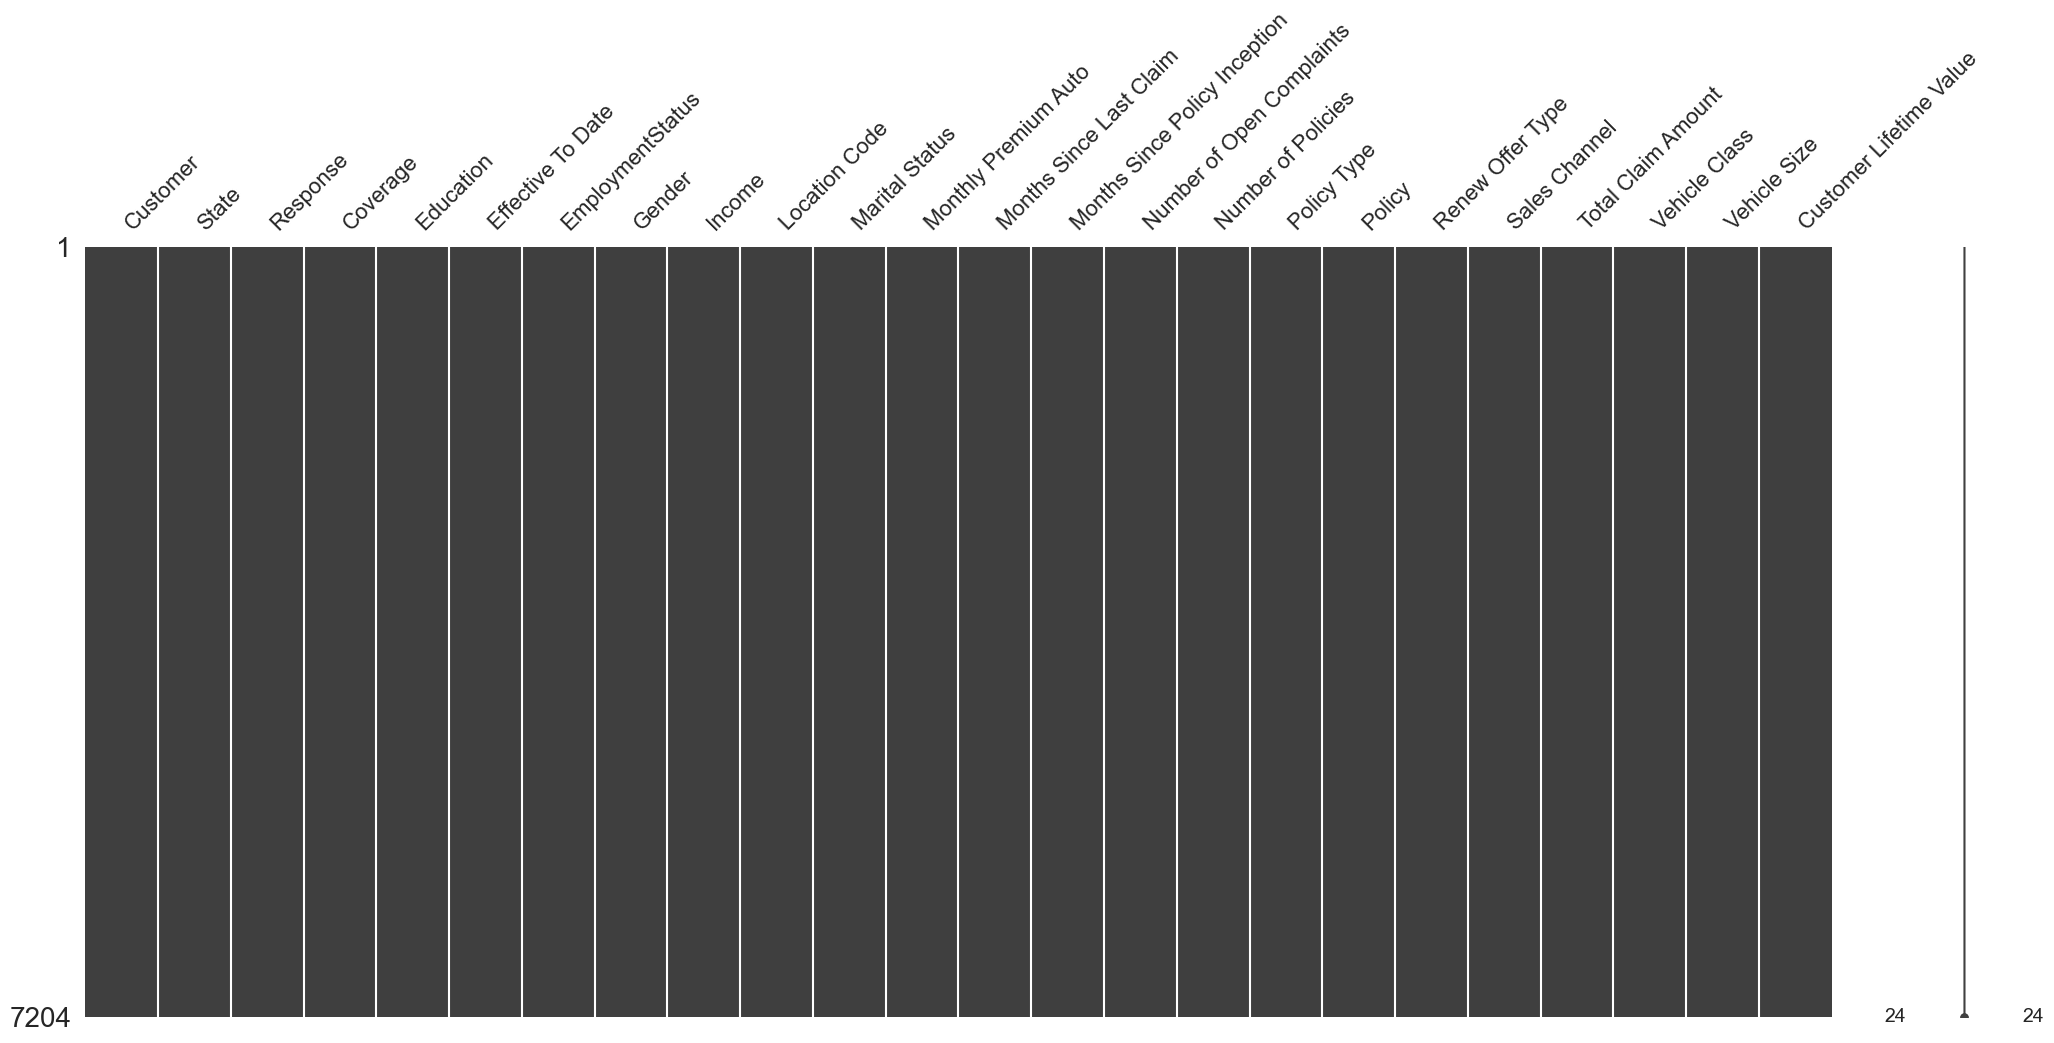

In [221]:
# missing values visualizations
msn.matrix(df)
plt.show()

## 3. Change Dtype

In [222]:
# changing Effective to Date data type to datetime
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'], format='mixed')
df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,YQ79307,Washington,No,Basic,Bachelor,2011-10-01,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924
1,CY49953,Oregon,No,Extended,College,2011-02-18,Unemployed,F,0,Suburban,Single,79,30,25,0,1,Special Auto,Special L2,Offer3,Branch,568.800000,Four-Door Car,Medsize,2827.559570
2,XN16891,Arizona,No,Basic,College,2011-02-28,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035
3,EP64069,California,No,Basic,Bachelor,2011-08-01,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998
4,IW77519,Washington,No,Basic,Bachelor,2011-01-18,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,FX81675,California,No,Basic,College,2011-01-29,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083
7200,ZU30804,California,Yes,Basic,College,2011-05-02,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679
7201,LA53648,California,No,Extended,High School or Below,2011-01-27,Unemployed,F,0,Suburban,Single,129,13,4,0,7,Personal Auto,Personal L1,Offer1,Call Center,1059.572464,SUV,Medsize,8992.779137
7202,IS30295,Arizona,Yes,Extended,Bachelor,2011-02-27,Unemployed,F,0,Suburban,Divorced,139,5,56,0,2,Personal Auto,Personal L3,Offer1,Call Center,667.200000,SUV,Medsize,14635.451580


In [223]:
# inspecting effective to date columns
df['Effective To Date'].value_counts()

Effective To Date
2011-10-01    156
2011-01-27    149
2011-01-17    149
2011-02-14    145
2011-01-31    143
2011-01-19    141
2011-02-19    138
2011-01-26    137
2011-03-01    136
2011-01-20    135
2011-02-26    134
2011-01-28    133
2011-02-27    133
2011-11-01    132
2011-02-22    131
2011-04-02    130
2011-05-02    129
2011-02-28    129
2011-12-02    128
2011-01-24    125
2011-01-01    125
2011-10-02    124
2011-02-01    124
2011-01-18    124
2011-01-21    123
2011-11-02    123
2011-09-01    122
2011-05-01    122
2011-02-25    120
2011-01-14    120
2011-02-18    119
2011-01-02    119
2011-01-15    119
2011-07-01    118
2011-02-13    118
2011-01-25    118
2011-01-13    118
2011-01-23    118
2011-02-21    118
2011-06-01    117
2011-02-24    117
2011-01-29    117
2011-02-23    116
2011-03-02    115
2011-01-16    115
2011-01-30    115
2011-07-02    114
2011-06-02    114
2011-02-02    114
2011-09-02    110
2011-01-22    105
2011-08-02    105
2011-02-17    104
2011-02-15    104
2011-02-16

## 4. Delete Columns 

> - Effective To Date (The date until the policy is effective) is related to Months Since Policy Inception (Duration), so it will be removed as it is not required for analysis.
> - Customer data will also be removed as it is not necessary for the analysis.

In [224]:
# dropping unnecessary columns
df.drop(columns= ['Customer', 'Effective To Date'], inplace=True)
df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,Washington,No,Basic,Bachelor,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924
1,Oregon,No,Extended,College,Unemployed,F,0,Suburban,Single,79,30,25,0,1,Special Auto,Special L2,Offer3,Branch,568.800000,Four-Door Car,Medsize,2827.559570
2,Arizona,No,Basic,College,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035
3,California,No,Basic,Bachelor,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998
4,Washington,No,Basic,Bachelor,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7199,California,No,Basic,College,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083
7200,California,Yes,Basic,College,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679
7201,California,No,Extended,High School or Below,Unemployed,F,0,Suburban,Single,129,13,4,0,7,Personal Auto,Personal L1,Offer1,Call Center,1059.572464,SUV,Medsize,8992.779137
7202,Arizona,Yes,Extended,Bachelor,Unemployed,F,0,Suburban,Divorced,139,5,56,0,2,Personal Auto,Personal L3,Offer1,Call Center,667.200000,SUV,Medsize,14635.451580


## 5. Delete Rows

> We will remove several some anomalies rows because it's impossible for the months since last claim to be greater than the months since policy inception if the insurance policy is only less than equal to 1.

In [225]:
# Inspecting anomalies 
check_anomalies = df[(df['Months Since Last Claim'] > df['Months Since Policy Inception']) & (df['Number of Policies'] <= 1)]
check_anomalies

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
1,Oregon,No,Extended,College,Unemployed,F,0,Suburban,Single,79,30,25,0,1,Special Auto,Special L2,Offer3,Branch,568.800000,Four-Door Car,Medsize,2827.559570
8,Oregon,No,Premium,College,Medical Leave,M,12811,Suburban,Married,150,27,0,2,1,Corporate Auto,Corporate L2,Offer2,Call Center,720.000000,SUV,Medsize,5253.487908
24,Arizona,No,Basic,College,Employed,F,37811,Suburban,Married,63,25,14,0,1,Special Auto,Special L2,Offer4,Agent,365.002909,Four-Door Car,Medsize,2530.810167
44,Oregon,No,Premium,High School or Below,Employed,M,56855,Suburban,Single,255,12,1,0,1,Corporate Auto,Corporate L3,Offer4,Web,1836.000000,Luxury SUV,Medsize,9951.707743
57,California,No,Basic,High School or Below,Unemployed,F,0,Suburban,Single,113,35,29,0,1,Personal Auto,Personal L1,Offer2,Call Center,1305.275432,SUV,Medsize,4014.918500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7152,Nevada,No,Extended,College,Unemployed,M,0,Suburban,Single,91,12,6,0,1,Corporate Auto,Corporate L3,Offer2,Call Center,707.264022,Four-Door Car,Small,3135.579831
7154,Arizona,No,Basic,Bachelor,Employed,M,59665,Urban,Single,62,33,3,1,1,Personal Auto,Personal L3,Offer1,Agent,167.138119,Two-Door Car,Medsize,2409.760898
7163,Oregon,Yes,Basic,Bachelor,Employed,F,89451,Rural,Single,63,11,2,0,1,Personal Auto,Personal L2,Offer2,Web,61.769564,Four-Door Car,Medsize,2530.705137
7170,Nevada,No,Basic,Bachelor,Medical Leave,F,19352,Suburban,Married,65,16,0,0,1,Personal Auto,Personal L3,Offer1,Branch,724.463534,Four-Door Car,Small,2467.620791


In [226]:
# Dropping anomalies data 
df.drop(check_anomalies.index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [227]:
# check updated dataframe 
df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,Washington,No,Basic,Bachelor,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924
1,Arizona,No,Basic,College,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035
2,California,No,Basic,Bachelor,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998
3,Washington,No,Basic,Bachelor,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217
4,California,No,Basic,College,Employed,F,38898,Suburban,Divorced,117,26,68,0,3,Corporate Auto,Corporate L2,Offer1,Agent,561.600000,SUV,Small,9100.787395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,Oregon,No,Basic,College,Disabled,F,12180,Suburban,Single,113,17,62,0,3,Corporate Auto,Corporate L3,Offer1,Agent,675.569113,SUV,Medsize,8428.471635
6784,California,No,Basic,College,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083
6785,California,Yes,Basic,College,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679
6786,California,No,Extended,High School or Below,Unemployed,F,0,Suburban,Single,129,13,4,0,7,Personal Auto,Personal L1,Offer1,Call Center,1059.572464,SUV,Medsize,8992.779137


## 6. Outliers

In [228]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

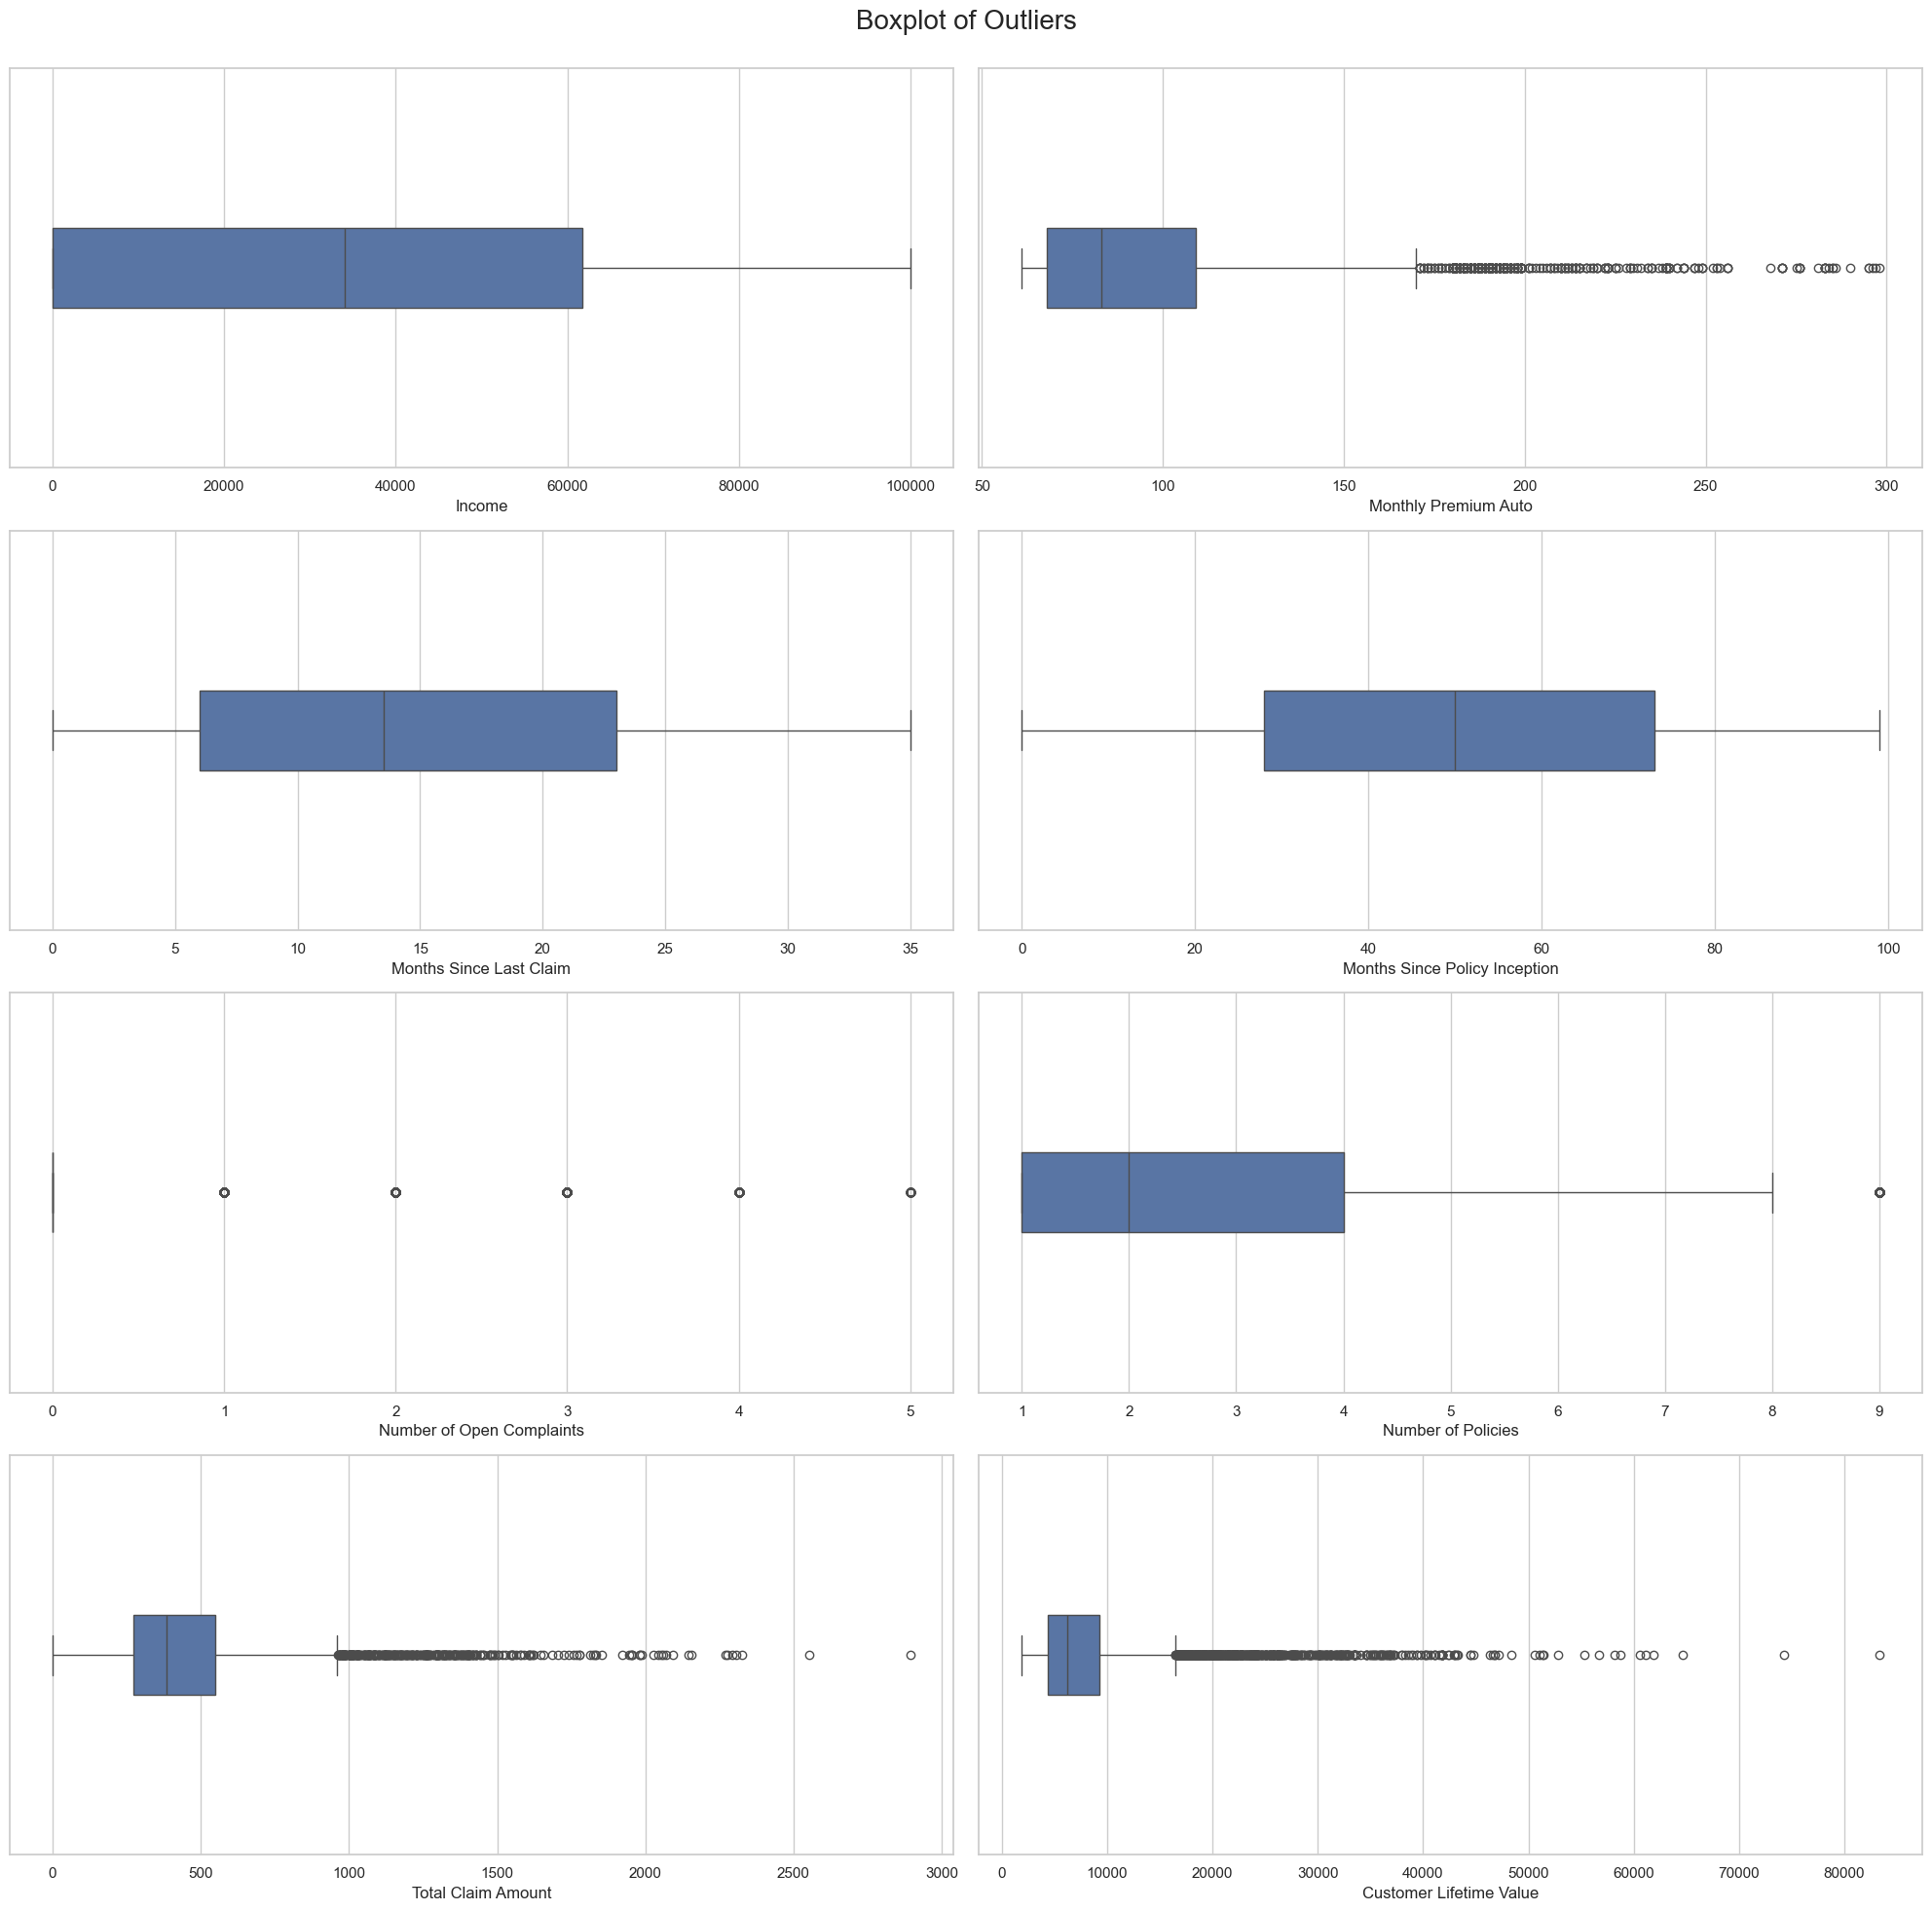

In [229]:
# Boxplot Outliers 

fig, ax = plt.subplots(4,2, figsize=(20,20))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, 
                data=df, 
                width=0.2, 
                ax=ax[i])

fig.suptitle('Boxplot of Outliers', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [230]:
# showing amount of the outliers 

def calculate_outliers(data,column): 
    Q1 = data[column].quantile(.25)
    Q3 = data[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1-(1.5 * IQR)
    upper_bound = Q3+(1.5 * IQR)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound
outlier_data = []

for i in num_cols: 
    outliers_result, lower_bound, upper_bound = calculate_outliers(df, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier/len(df[i]*100),2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])


outlier_df = pd.DataFrame(outlier_data, columns=['column', 'total_outlier', 'percentage', 'lower_bound', 'upper_bound'])
outlier_df

,column,total_outlier,percentage,lower_bound,upper_bound
0,Income,0,0.00,-92711.250000,154518.750000
1,Monthly Premium Auto,343,0.05,6.500000,170.500000
2,Months Since Last Claim,0,0.00,-19.500000,48.500000
3,Months Since Policy Inception,0,0.00,-39.500000,140.500000
4,Number of Open Complaints,1379,0.20,0.000000,0.000000
5,Number of Policies,338,0.05,-3.500000,8.500000
6,Total Claim Amount,355,0.05,-140.986402,962.218515
7,Customer Lifetime Value,627,0.09,-2898.656504,16492.804596


> There will be no removal of outliers as these will be useful for our further analysis.

# Exploratory Data Analysis

## Barplots

In [231]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'datetime']).columns.tolist()

In [232]:
for col in cat_cols: 
    print({col: df[col].nunique()})
    

{'State': 5}
{'Response': 2}
{'Coverage': 3}
{'Education': 5}
{'EmploymentStatus': 5}
{'Gender': 2}
{'Location Code': 3}
{'Marital Status': 3}
{'Policy Type': 3}
{'Policy': 9}
{'Renew Offer Type': 4}
{'Sales Channel': 4}
{'Vehicle Class': 6}
{'Vehicle Size': 3}


> removing customer and effective to date from cat_cols because too many unique values

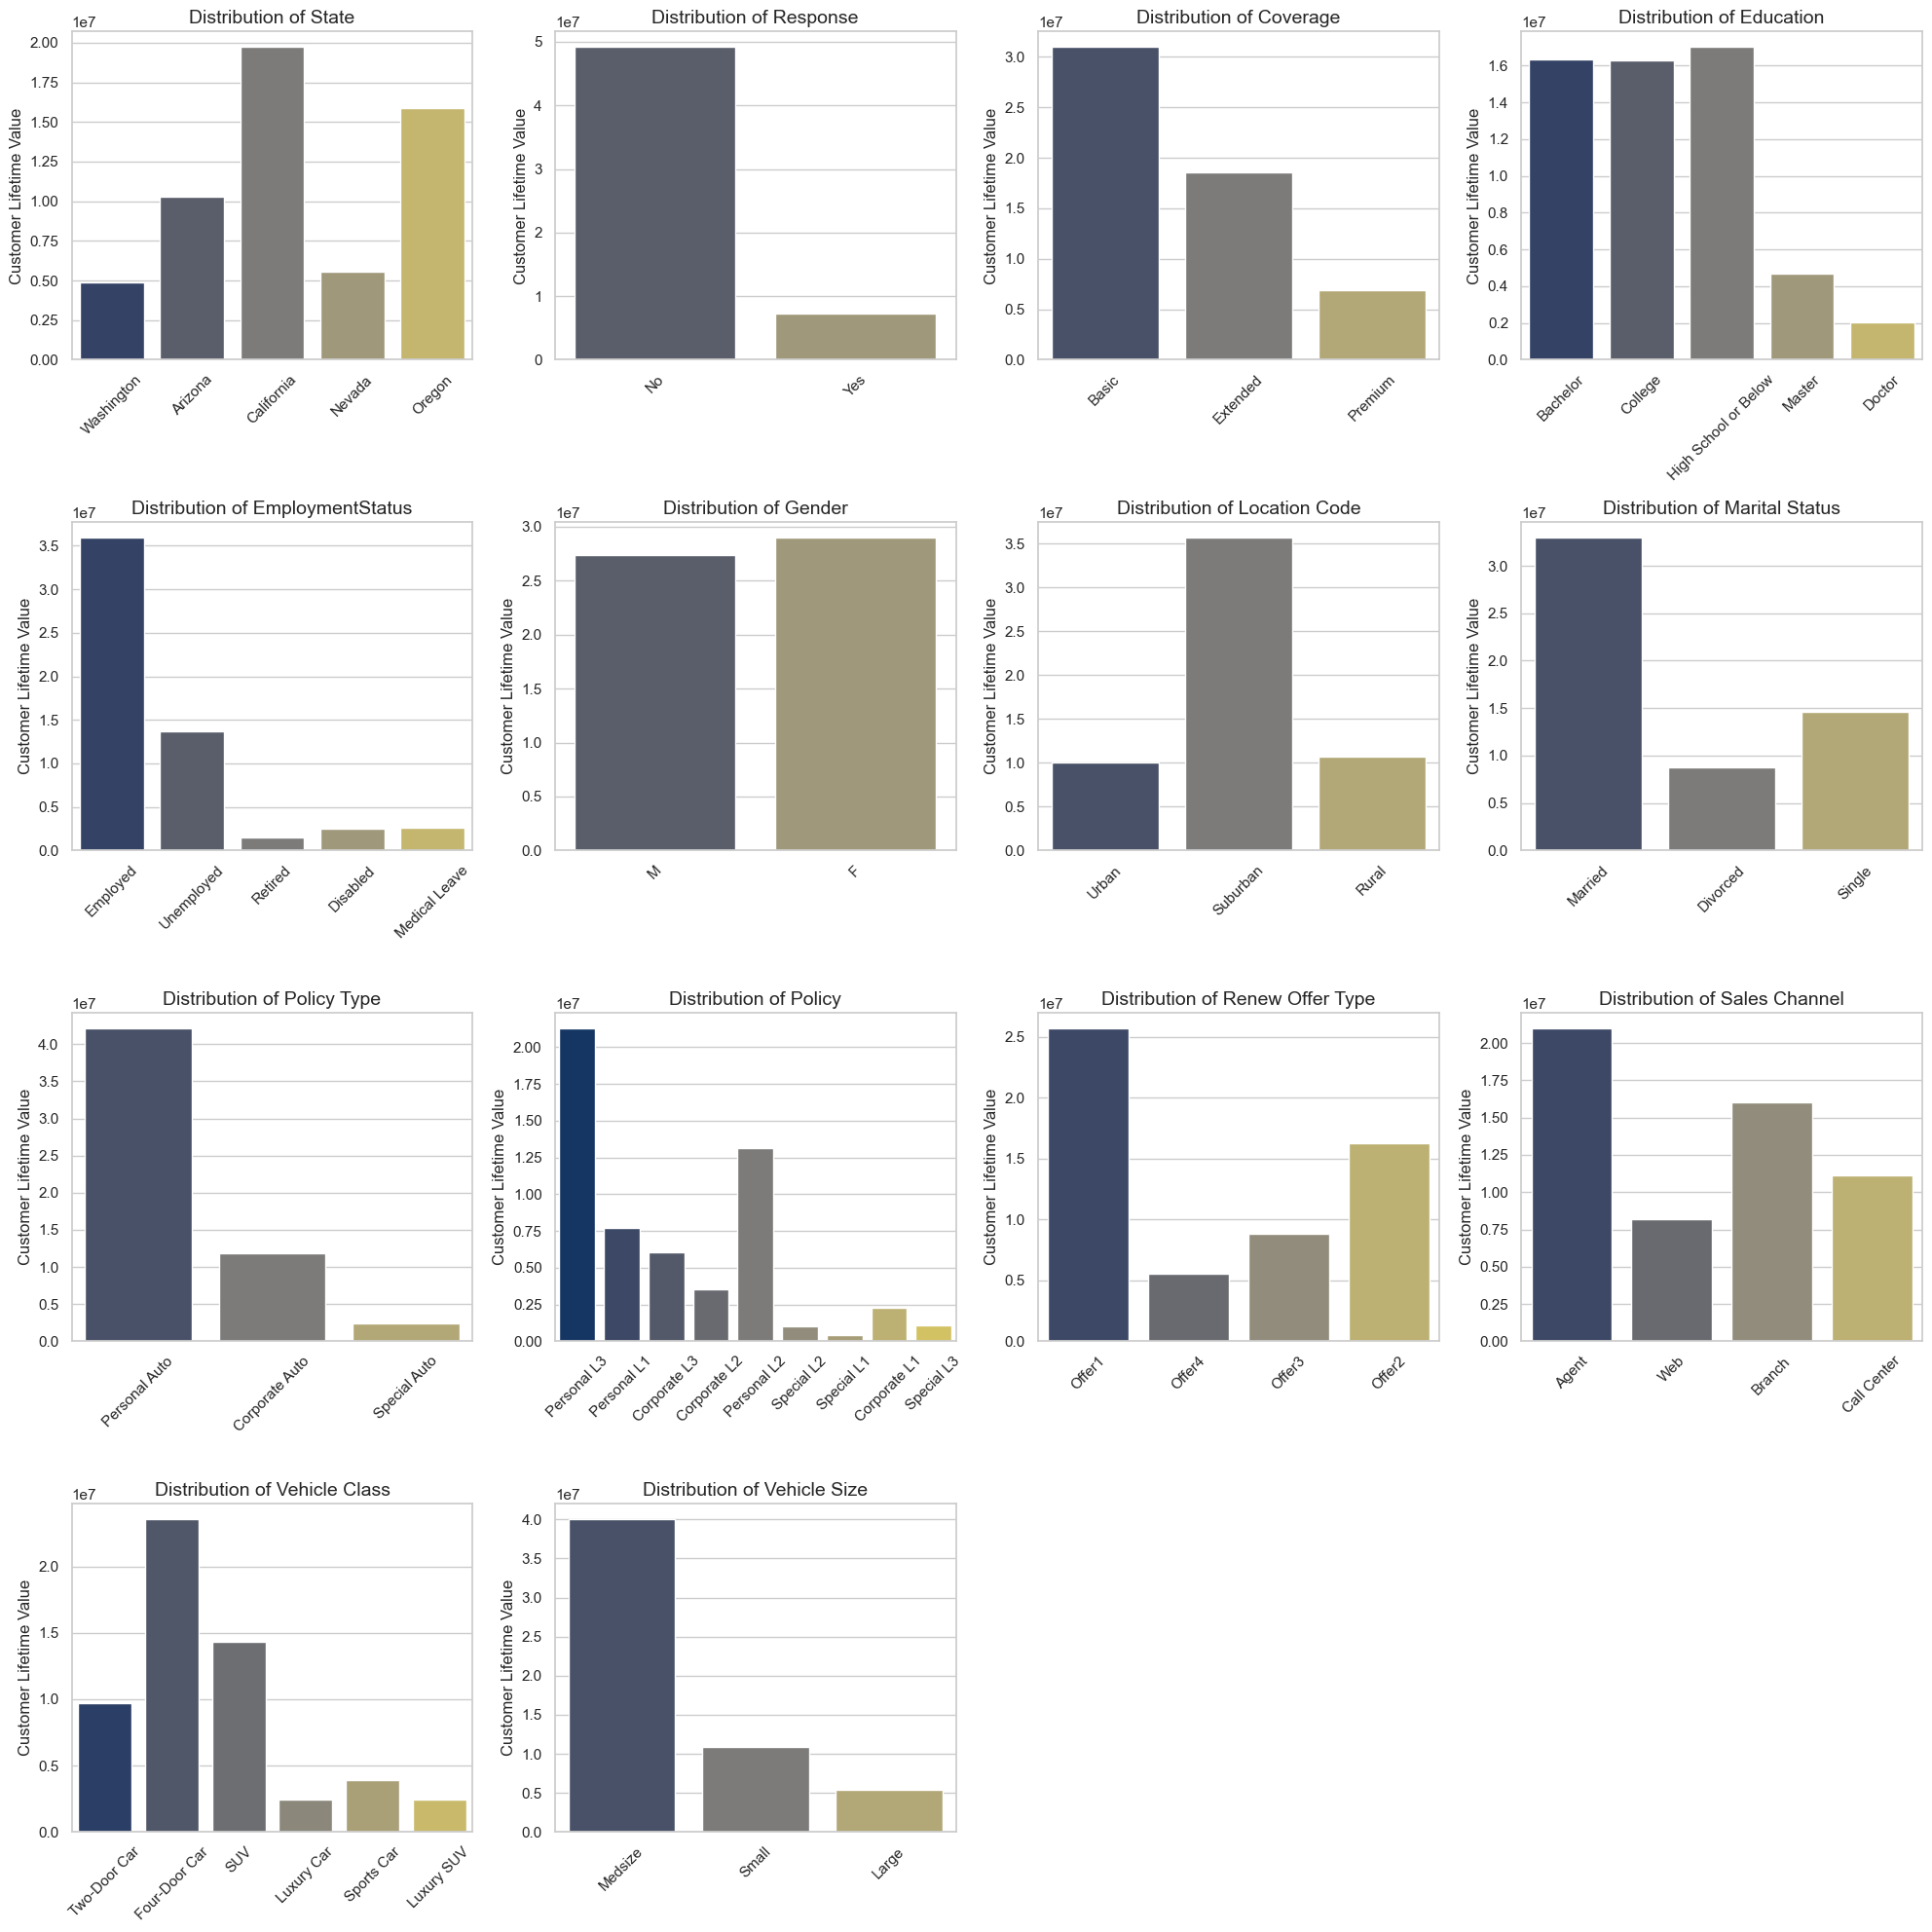

In [233]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()  

# Create a barplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.barplot(x=col, 
                  y= 'Customer Lifetime Value',
                  data=df, 
                  palette= 'cividis',
                  estimator=sum, 
                  ci=None,
                  ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='x', rotation=45) 

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

## Pie Chart 

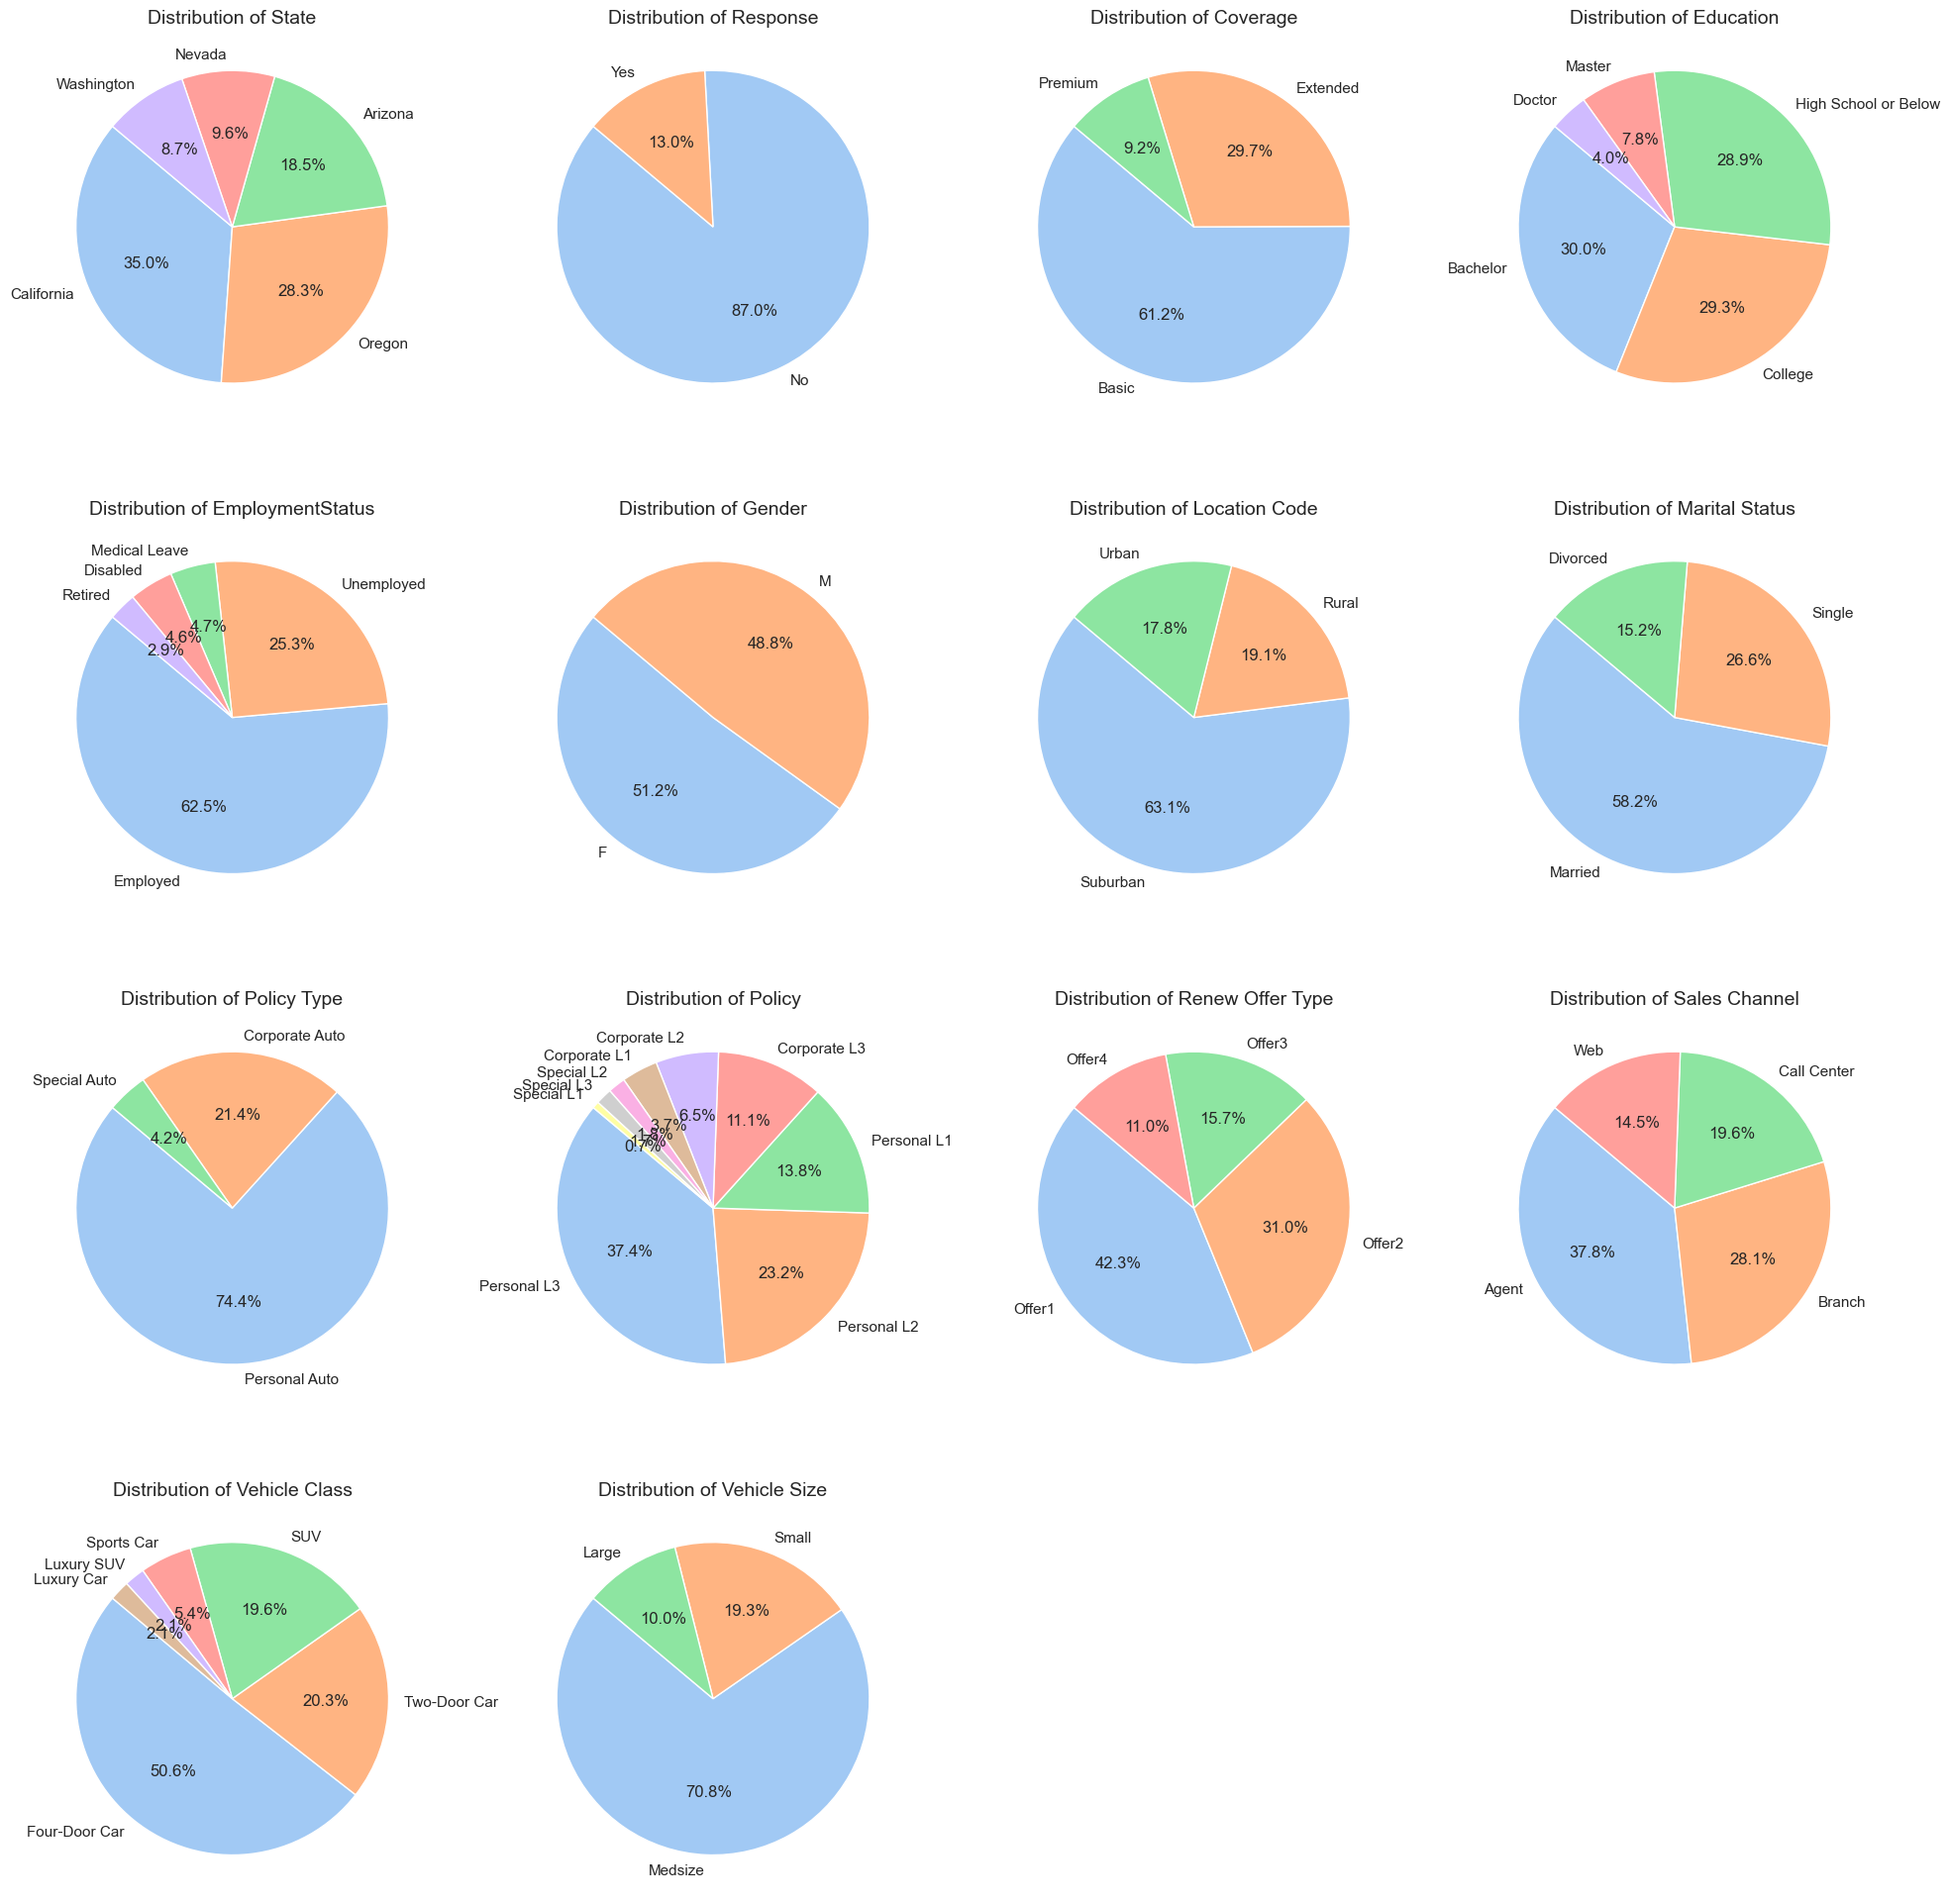

In [234]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    # Calculate the sum of Customer Lifetime Value for each category
    data = df[col].value_counts()
    
    # Plot pie chart
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    
    # Set title for each pie chart
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [235]:
df['Response'].value_counts()

Response
No     5903
Yes     885
Name: count, dtype: int64

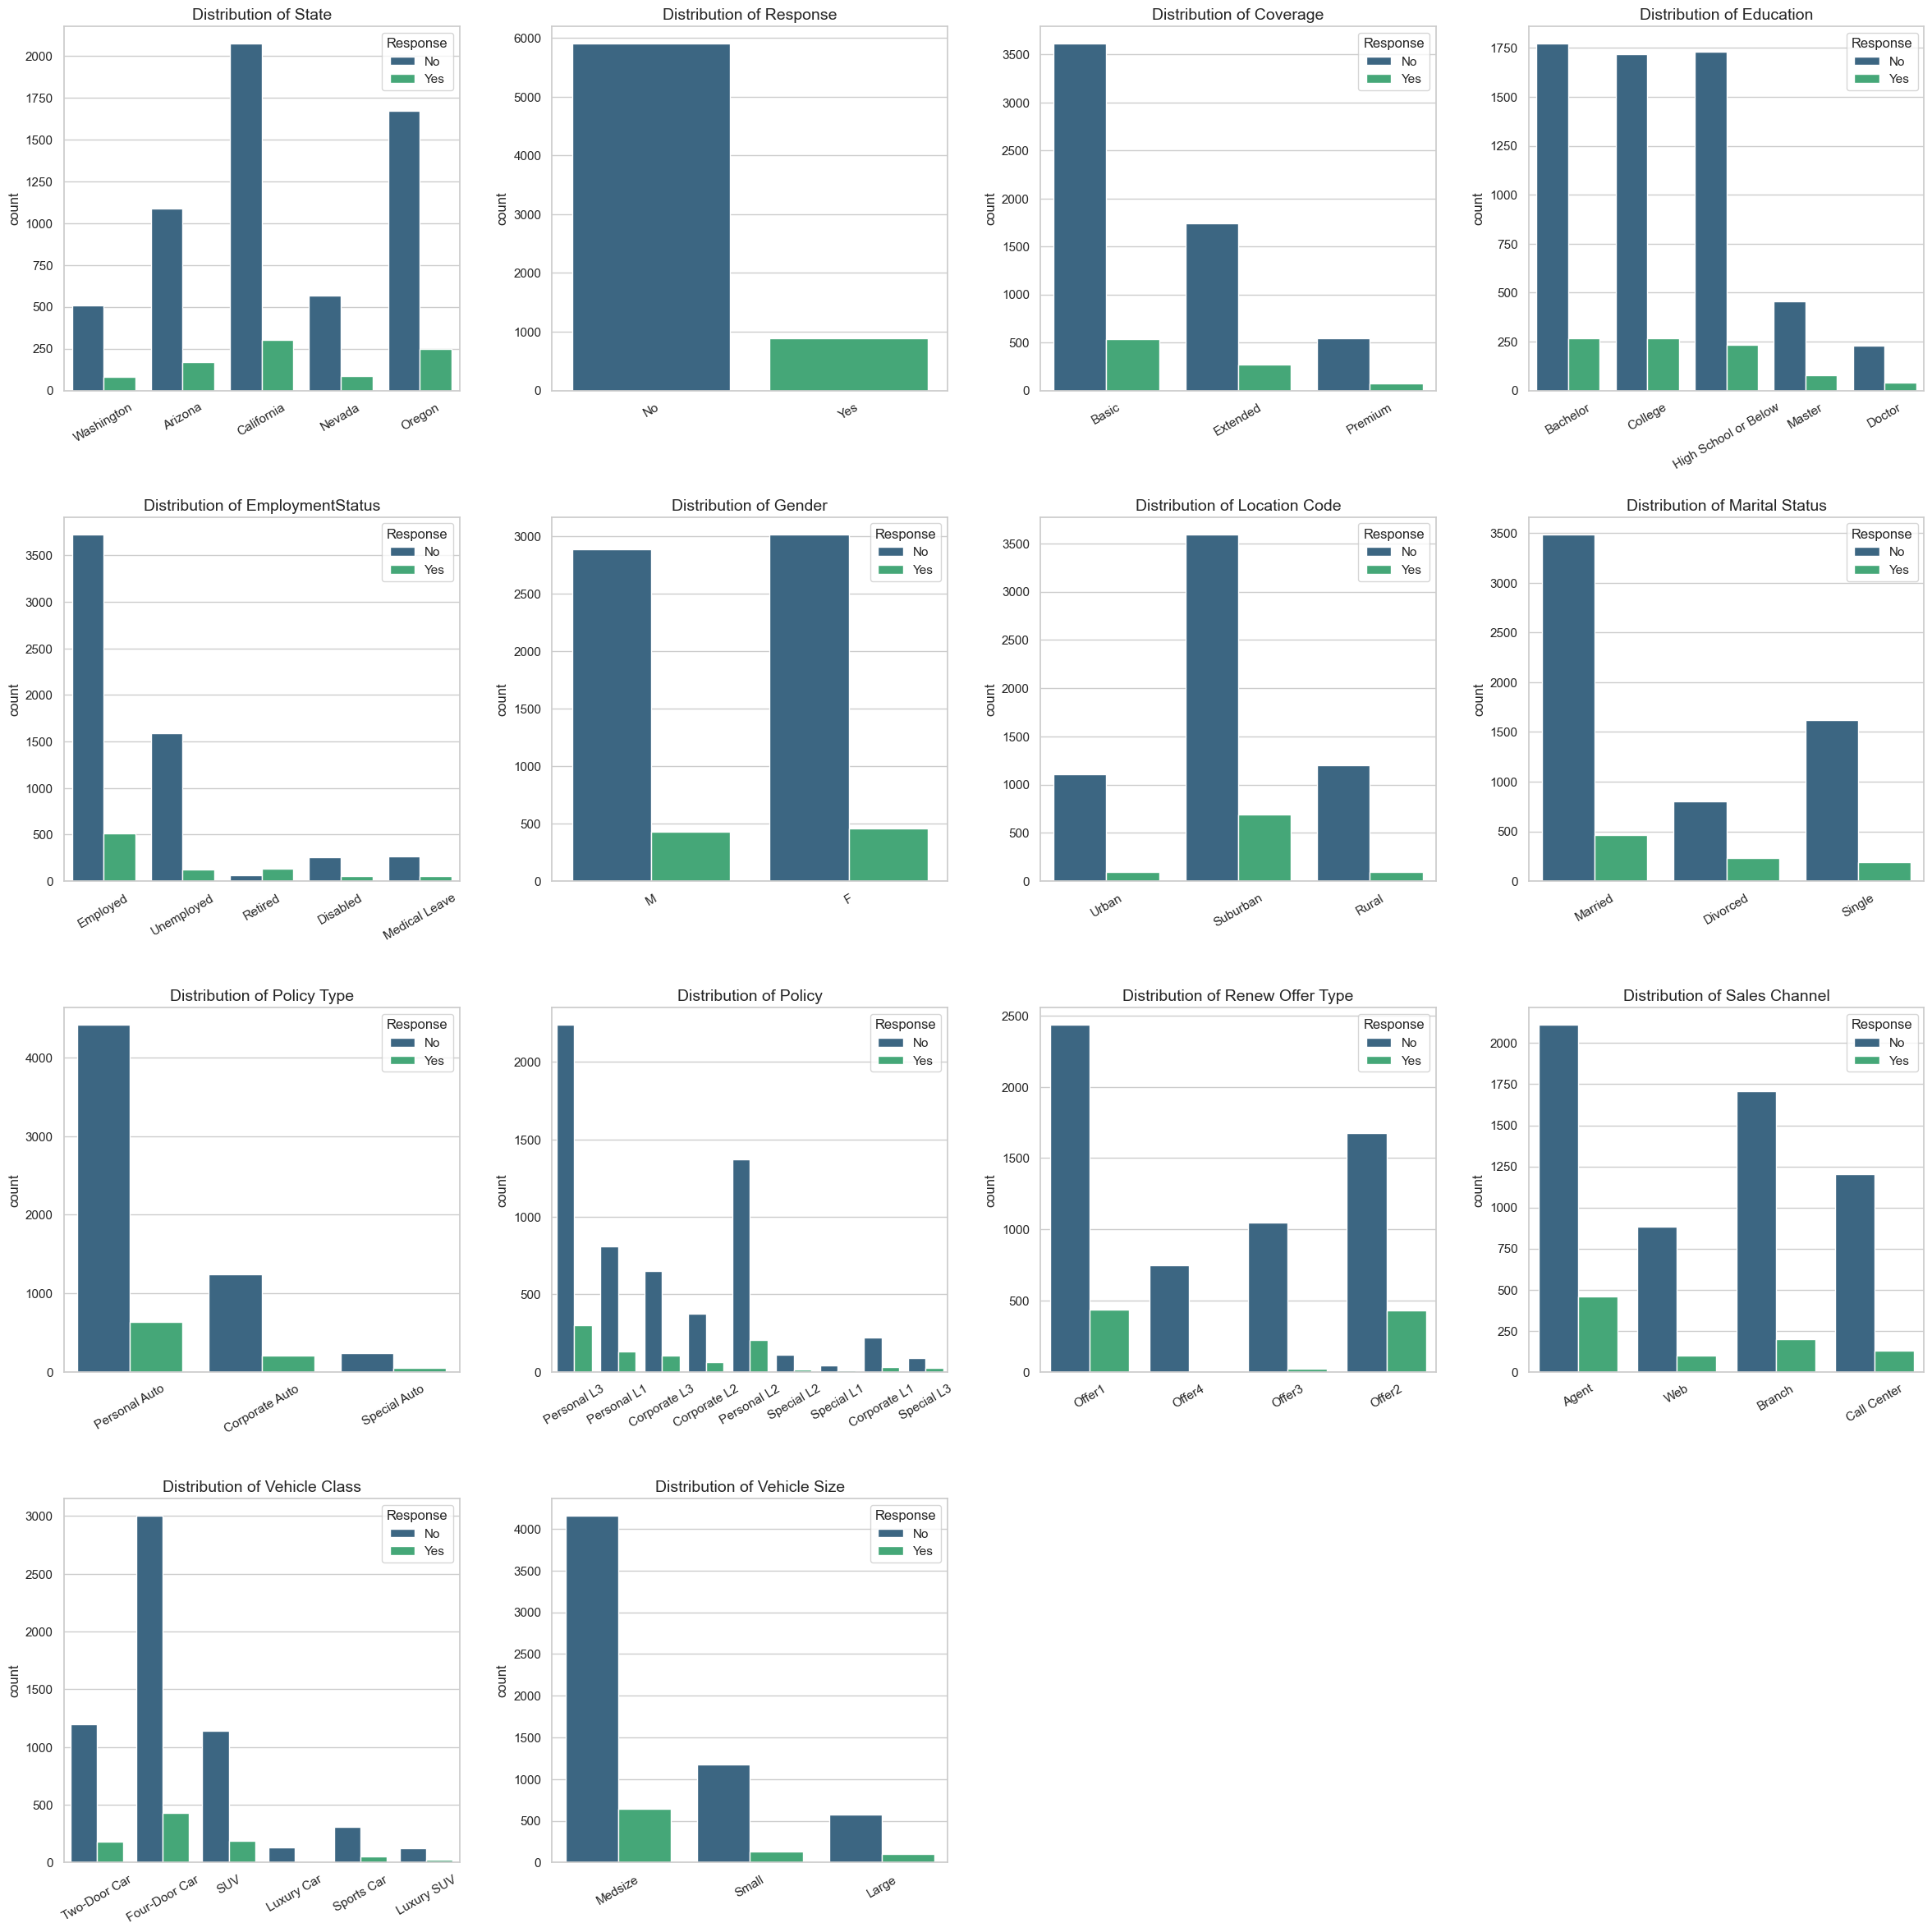

In [236]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 4, figsize=(24, 24))
axes = axes.flatten()  

# Create a barplot for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col,
                  data=df, 
                  palette='viridis',
                  hue= 'Response',
                  ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x labels slightly less

# Hide any unused subplots if there are less than 16 plots
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)  # Add padding to layout
plt.show()


In [237]:
df[df['Response'] == 'Yes']

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
12,Washington,Yes,Basic,Bachelor,Retired,M,14973,Suburban,Divorced,115,2,75,0,2,Corporate Auto,Corporate L3,Offer1,Branch,828.000000,SUV,Medsize,12168.744920
14,Oregon,Yes,Basic,High School or Below,Unemployed,F,0,Suburban,Divorced,63,4,52,0,2,Personal Auto,Personal L2,Offer2,Agent,685.126940,Four-Door Car,Medsize,16468.220790
15,California,Yes,Basic,Bachelor,Employed,M,35095,Suburban,Divorced,73,25,56,0,2,Personal Auto,Personal L1,Offer2,Call Center,525.600000,Two-Door Car,Small,16979.797570
21,Oregon,Yes,Basic,High School or Below,Unemployed,F,0,Suburban,Single,61,17,1,1,7,Corporate Auto,Corporate L3,Offer1,Agent,292.800000,Four-Door Car,Small,4250.282624
22,Oregon,Yes,Basic,High School or Below,Medical Leave,M,12430,Suburban,Single,73,22,13,0,4,Personal Auto,Personal L3,Offer2,Call Center,350.400000,Four-Door Car,Medsize,5169.499370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,Arizona,Yes,Basic,Bachelor,Employed,M,78618,Urban,Divorced,66,7,56,0,1,Corporate Auto,Corporate L3,Offer1,Agent,225.578841,Two-Door Car,Medsize,2619.337376
6770,Oregon,Yes,Basic,College,Employed,M,83846,Suburban,Married,74,22,94,3,2,Personal Auto,Personal L1,Offer2,Agent,355.200000,Four-Door Car,Large,8717.049833
6781,California,Yes,Basic,High School or Below,Employed,F,20090,Suburban,Married,109,10,59,0,2,Special Auto,Special L3,Offer2,Agent,523.200000,Sports Car,Medsize,34611.378960
6785,California,Yes,Basic,College,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679


In [238]:
df[df['Response'] == 'No']

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value
0,Washington,No,Basic,Bachelor,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924
1,Arizona,No,Basic,College,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035
2,California,No,Basic,Bachelor,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998
3,Washington,No,Basic,Bachelor,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217
4,California,No,Basic,College,Employed,F,38898,Suburban,Divorced,117,26,68,0,3,Corporate Auto,Corporate L2,Offer1,Agent,561.600000,SUV,Small,9100.787395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,California,No,Basic,Bachelor,Unemployed,F,0,Suburban,Married,64,12,56,3,1,Corporate Auto,Corporate L1,Offer4,Call Center,307.200000,Two-Door Car,Medsize,2236.085718
6782,California,No,Basic,Bachelor,Employed,M,83140,Urban,Married,61,25,70,0,1,Corporate Auto,Corporate L3,Offer4,Agent,179.161843,Four-Door Car,Medsize,2430.506586
6783,Oregon,No,Basic,College,Disabled,F,12180,Suburban,Single,113,17,62,0,3,Corporate Auto,Corporate L3,Offer1,Agent,675.569113,SUV,Medsize,8428.471635
6784,California,No,Basic,College,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083


## Scatterplots

In [239]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

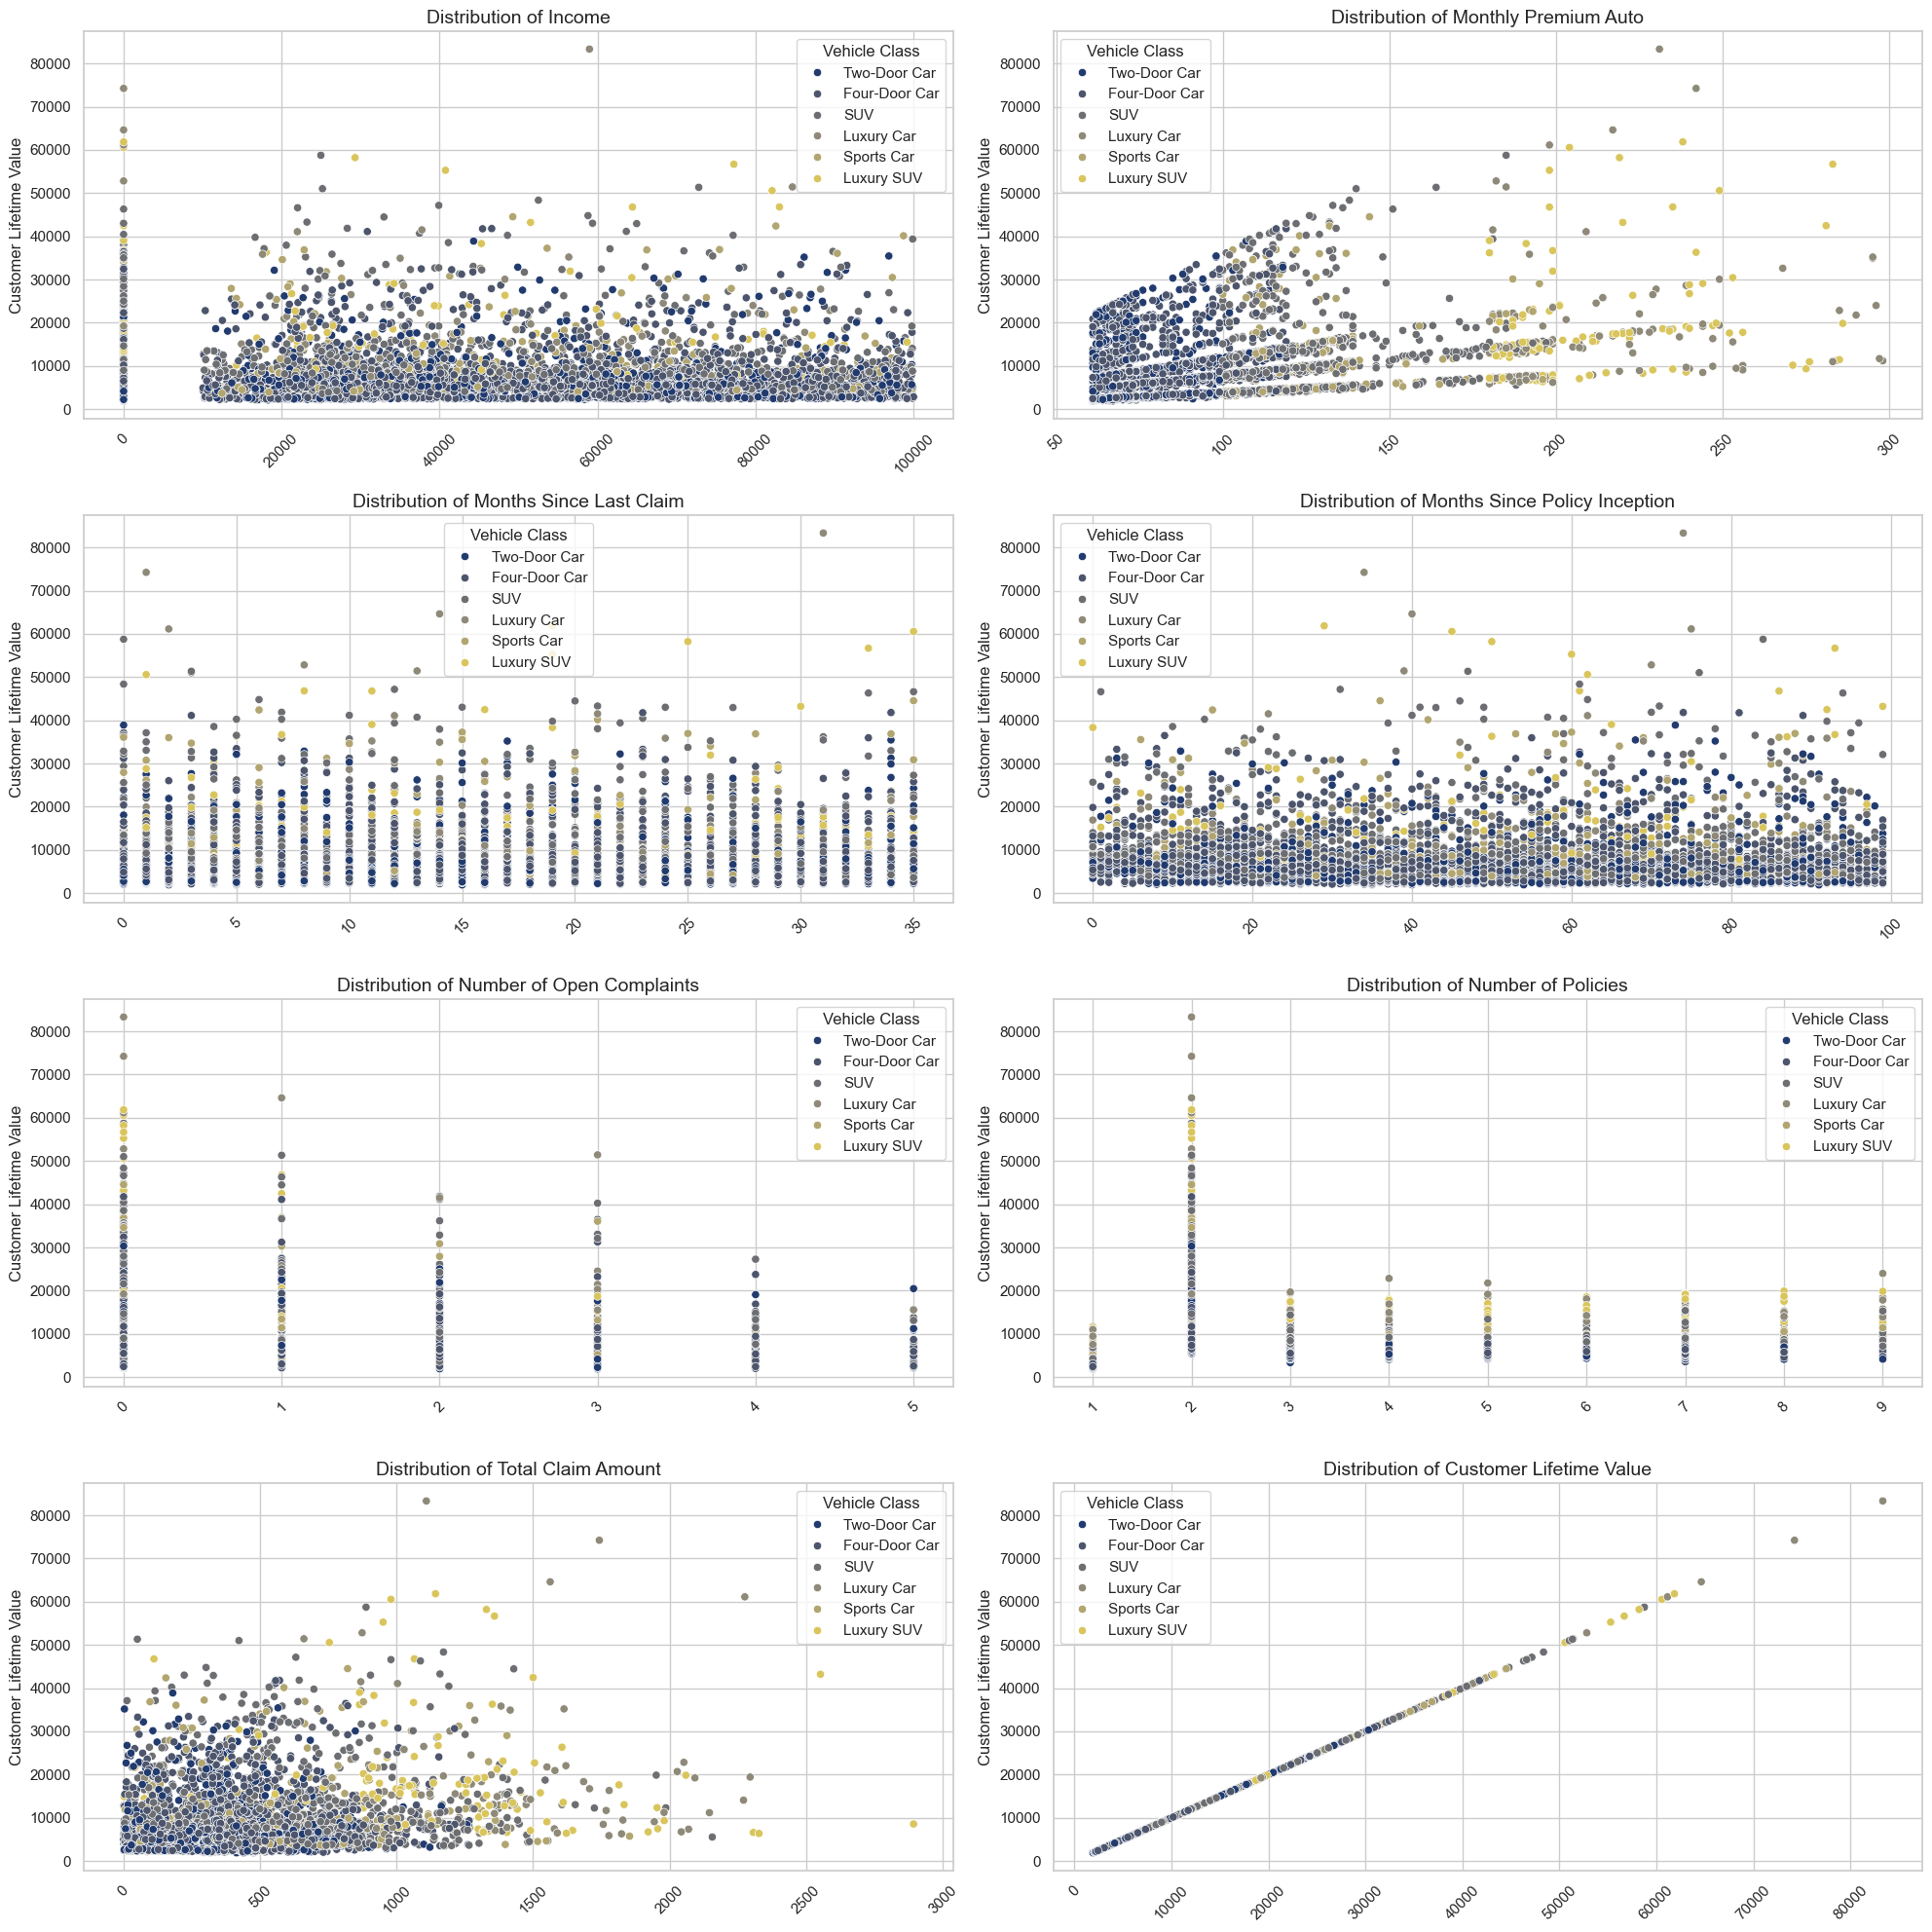

In [240]:
# Set up the figure and axes for the subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.flatten()  

# Create a barplot for each numerical column
for i, col in enumerate(num_cols):
    sns.scatterplot(x=col, 
                  y= 'Customer Lifetime Value',
                  data=df,
                  hue= 'Vehicle Class', 
                  palette='cividis',
                  ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('')  
    axes[i].tick_params(axis='x', rotation=45) 

# Hide any unused subplots if there are less than 16 plots
for j in range(len(num_cols), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [241]:
corr = df[num_cols].corr()

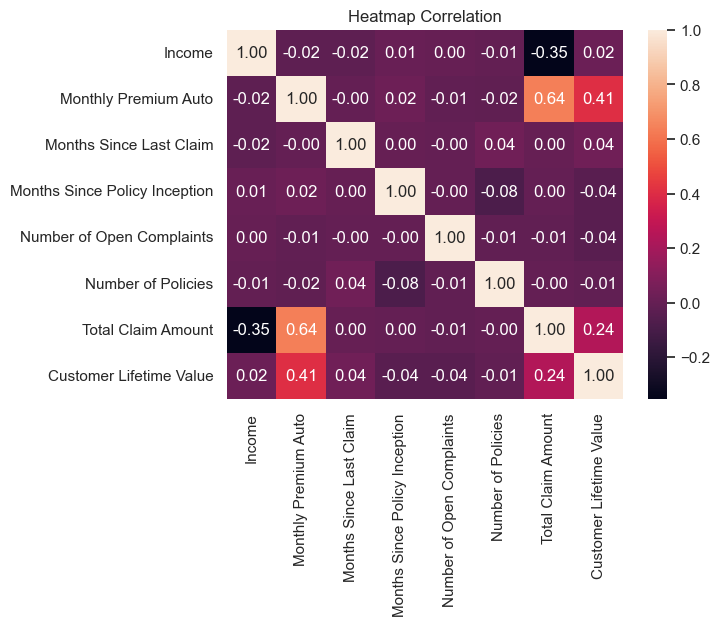

In [242]:
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Heatmap Correlation', size = 12)
plt.show()

# Machine Learning Models

## Feature Selection 

In [243]:
X = df.drop(['Customer Lifetime Value'], axis=1)
y = df['Customer Lifetime Value']

## Splitting 

In [244]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size= 0.2, 
    random_state= 42
)

## Scaling and Encoding

In [245]:
for col in cat_cols: 
    print(col, ': ', df[col].nunique())

State :  5
Response :  2
Coverage :  3
Education :  5
EmploymentStatus :  5
Gender :  2
Location Code :  3
Marital Status :  3
Policy Type :  3
Policy :  9
Renew Offer Type :  4
Sales Channel :  4
Vehicle Class :  6
Vehicle Size :  3


- One Hot Encoder : State, Response, Coverage, Gender, Location Code, Marital Status, Renew Offer Type, Sales Channel
- Ordinal Encoder : Education, Employment Status, Policy Type, Vehicle Class, Vehicle Size 
- Binary Encoder : Policy 

In [246]:
# Encoding features
onehot_enc = ['State', 'Response', 'Coverage', 'Gender', 'Location Code', 'Marital Status', 'Renew Offer Type', 'Sales Channel']
ordinal_enc = ['Education', 'EmploymentStatus', 'Policy Type', 'Policy', 'Vehicle Class', 'Vehicle Size'] 

In [247]:
for col in ordinal_enc: 
    print(col, ': ', df[col].unique())

Education :  ['Bachelor' 'College' 'High School or Below' 'Master' 'Doctor']
EmploymentStatus :  ['Employed' 'Unemployed' 'Retired' 'Disabled' 'Medical Leave']
Policy Type :  ['Personal Auto' 'Corporate Auto' 'Special Auto']
Policy :  ['Personal L3' 'Personal L1' 'Corporate L3' 'Corporate L2' 'Personal L2'
 'Special L2' 'Special L1' 'Corporate L1' 'Special L3']
Vehicle Class :  ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury Car' 'Sports Car'
 'Luxury SUV']
Vehicle Size :  ['Medsize' 'Small' 'Large']


In [248]:
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
employment_status_order = ['Unemployed', 'Medical Leave', 'Disabled', 'Retired', 'Employed']
policy_type_order = ['Personal Auto', 'Corporate Auto', 'Special Auto']
policy_order = ['Personal L1', 'Personal L2', 'Personal L3',
                'Corporate L1', 'Corporate L2', 'Corporate L3',
                'Special L1', 'Special L2', 'Special L3']
vehicle_class_order = ['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury Car', 'Sports Car', 'Luxury SUV']
vehicle_size_order = ['Small', 'Medsize', 'Large']

In [249]:
num_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount',
 'Customer Lifetime Value']

In [250]:
# Scaling features
scaler_cols = num_cols.copy()
scaler_cols.remove('Customer Lifetime Value')
scaler_cols

['Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [251]:
# Pipeline
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_enc), 
        ('ordinal', OrdinalEncoder(categories=[education_order, employment_status_order, policy_type_order, policy_order, vehicle_class_order, vehicle_size_order]), ordinal_enc),
        ('scaler', RobustScaler(), scaler_cols)
    ],
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['State', 'Response', 'Coverage', 'Gender',
                                  'Location Code', 'Marital Status',
                                  'Renew Offer Type', 'Sales Channel']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor'],
                                                            ['Unemployed',
                                                             'Medical Leave',
                                                             'Disabled',
                                                             'Retired',...
                                                            ['Two-Door Car',
                                                             'Four-Door Car',
                                                             'SUV',
                                                             'Luxury Car',
                                                             'Sports Car',
                                                             'Luxury SUV'],
                                                            ['Small', 'Medsize',
                                                             'Large']]),
                                 ['Education', 'EmploymentStatus',
                                  'Policy Type', 'Policy', 'Vehicle Class',
                                  'Vehicle Size']),
                                ('scaler', RobustScaler(),
                                 ['Income', 'Monthly Premium Auto',
                                  'Months Since Last Claim',
                                  'Months Since Policy Inception',
                                  'Number of Open Complaints',
                                  'Number of Policies',
                                  'Total Claim Amount'])])

In [252]:
x_transformed = transformer.fit_transform(X)
x_transformed

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         2.33333333, -0.58264706],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.33333333, -0.10442303],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         2.33333333, -0.40373336],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.33333333, -0.12182687],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.66666667,  2.4494904 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.02682646]])

In [253]:
transformed_columns = (
    transformer.named_transformers_['onehot'].get_feature_names_out(onehot_enc).tolist() +
    transformer.named_transformers_['ordinal'].get_feature_names_out(ordinal_enc).tolist() +
    scaler_cols 
)
x_transformed_df= pd.DataFrame(x_transformed, columns=transformed_columns)
x_transformed_df

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Education,EmploymentStatus,Policy Type,Policy,Vehicle Class,Vehicle Size,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,0.0,1.0,0.277143,-0.536585,0.852941,-0.400000,1.0,2.333333,-0.582647
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.761760,-0.219512,-0.382353,0.377778,0.0,-0.333333,-0.104423
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,1.0,5.0,1.0,1.0,0.618849,-0.463415,-0.676471,0.355556,0.0,2.333333,-0.403733
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,2.0,1.0,1.0,0.335275,-0.414634,-0.617647,0.800000,0.0,-0.333333,0.028899
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0,0.0,0.079011,0.829268,0.735294,0.400000,0.0,0.333333,0.643942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,2.0,1.0,-0.353266,0.731707,0.205882,0.266667,0.0,0.333333,1.057171
6784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,1.0,0.0,0.872750,-0.536585,1.029412,0.288889,0.0,0.000000,-0.274396
6785,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,-0.185973,-0.243902,0.205882,0.311111,0.0,0.333333,-0.121827
6786,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-0.550330,1.121951,-0.029412,-1.022222,0.0,1.666667,2.449490


## Multiple Linear Regression

In [254]:
x_trans_linreg = sm.add_constant(x_transformed_df)

In [255]:
# OLS Models
sm_lm_ols = sm.OLS(y, x_trans_linreg)
result_ols = sm_lm_ols.fit()

In [256]:
print(result_ols.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.177
Model:                                 OLS   Adj. R-squared:                  0.173
Method:                      Least Squares   F-statistic:                     46.91
Date:                     Mon, 12 Aug 2024   Prob (F-statistic):          5.92e-258
Time:                             18:34:23   Log-Likelihood:                -68971.
No. Observations:                     6788   AIC:                         1.380e+05
Df Residuals:                         6756   BIC:                         1.382e+05
Df Model:                               31                                         
Covariance Type:                 nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

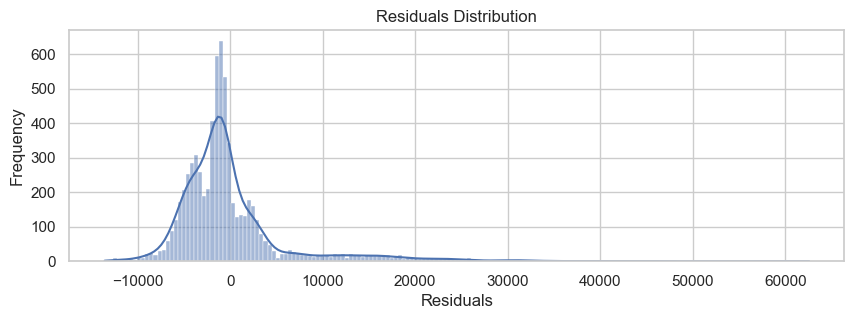

In [257]:
# Analisis Residual
residuals = result_ols.resid

# Plot residual
plt.figure(figsize=(10, 3))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

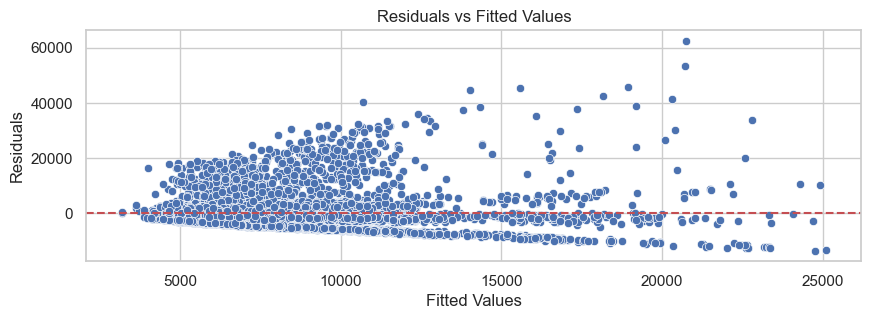

In [258]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 3))
sns.scatterplot(x=result_ols.fittedvalues, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [259]:
# VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["feature"] = x_transformed_df.columns
vif_data["VIF"] = [variance_inflation_factor(x_transformed_df, i) for i in range(x_transformed_df.shape[1])]

vif_data

,feature,VIF
0,State_California,2.670568
1,State_Nevada,1.456537
2,State_Oregon,2.351804
3,State_Washington,1.408526
4,Response_Yes,1.291671
5,Coverage_Extended,1.791399
6,Coverage_Premium,1.694293
7,Gender_M,1.959536
8,Location Code_Suburban,7.807113
9,Location Code_Urban,2.110310


In [260]:
# model prediction
y_pred = result_ols.predict(x_trans_linreg)

# Counting MAE, MAPE, R2, and Adjusted R2
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
r2 = r2_score(y, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x_trans_linreg.shape[1] - 1)
rmspe = np.sqrt(np.mean(np.square((y - y_pred) / y))) * 100

# showing the result
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'RMSPE: {rmspe}')
print(f'R2: {r2}')
print(f'Adjusted R2: {adjusted_r2}')


MAE: 3863.6689191223154
MSE: 39179180.24548586
RMSE: 6259.327459518782
MAPE: 57.89312321783593
RMSPE: 78.67827476191842
R2: 0.1771190483160967
Adjusted R2: 0.1732208706027163


## Benchmark Model 

In [261]:
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regression': DecisionTreeRegressor(random_state=42),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Xtreme Gradient Boosting' : xgb.XGBRegressor()
}

### Model Evaluation and Comparison 

In [262]:
# Define the adjusted R² score class
class AdjustedR2Score:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
    def __call__(self, y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (self.n - 1) / (self.n - self.p - 1)
        return adjusted_r2
    
    def __name__(self):
        return 'adjusted_r2_score'

# Initialize the custom adjusted R2 scorer with the number of samples and features
n_samples, n_features = X_train.shape
adjusted_r2_scorer = AdjustedR2Score(n_samples, n_features)

# Create the scorer
adjusted_r2 = make_scorer(adjusted_r2_scorer, greater_is_better=True)

# Initialize lists to store results
results = []

# Perform cross-validation and store results
for model_name, model in models.items():
    # Timing start
    start_time = time.time()
    
    # Define pipeline
    pipeline = Pipeline(steps=[('transformer', transformer), 
                               ('regressor', model)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate metrics
    test_mae = mean_absolute_error(y_test, y_pred)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mape = mean_absolute_percentage_error(y_test, y_pred)
    test_rmspe = np.sqrt(np.mean(np.square((y_test - y_pred) / y_test))) * 100
    test_r2 = r2_score(y_test, y_pred)
    
    # Calculate Adjusted R2 on test set
    test_adj_r2 = adjusted_r2_scorer(y_test, y_pred)
    
    # Perform cross-validation
    cv_results = cross_validate(pipeline, 
                                X_train, 
                                y_train, 
                                cv=5, 
                                scoring={'MAPE': 'neg_mean_absolute_percentage_error', 
                                         'Adj_R2': adjusted_r2,
                                         'MAE': 'neg_mean_absolute_error',
                                         'MSE': 'neg_mean_squared_error',
                                         'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)))},
                                return_train_score=False) 
    
    # Calculate scores
    train_mape = -cv_results['test_MAPE'].mean()
    train_adj_r2 = cv_results['test_Adj_R2'].mean()
    train_mae = -cv_results['test_MAE'].mean()
    train_mse = -cv_results['test_MSE'].mean()
    train_rmse = np.sqrt(-cv_results['test_RMSE'].mean())
    
    # Calculate average score difference
    avg_score_diff = train_mape - test_mape
    avg_adj_r2_diff = train_adj_r2 - test_adj_r2
    avg_mae_diff = train_mae - test_mae
    avg_mse_diff = train_mse - test_mse
    avg_rmse_diff = train_rmse - test_rmse
    
    # Calculate computation time
    computation_time = time.time() - start_time

    # Model Size 
    model_size = sys.getsizeof(pickle.dumps(pipeline)) / (1024 * 1024)
    
    # Append results
    results.append({
        'Model': model_name,
        'Train MAPE': train_mape,
        'Test MAPE': test_mape,
        'Difference MAPE': avg_score_diff,
        'Train Adj R2': train_adj_r2,
        'Test Adj R2': test_adj_r2,
        'Difference Adj R2': avg_adj_r2_diff,
        'Train MAE': train_mae,
        'Test MAE': test_mae,
        'Difference MAE': avg_mae_diff,
        'Train MSE': train_mse,
        'Test MSE': test_mse,
        'Difference MSE': avg_mse_diff,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Difference RMSE': avg_rmse_diff,
        'Computation Time (seconds)': computation_time,
        'Model Size (MB)': model_size
    })

# Create DataFrame from results
benchmark_model = pd.DataFrame(results).sort_values(by='Test MAPE', ascending=True).reset_index(drop=True)

benchmark_model


,Model,Train MAPE,Test MAPE,Difference MAPE,Train Adj R2,Test Adj R2,Difference Adj R2,Train MAE,Test MAE,Difference MAE,Train MSE,Test MSE,Difference MSE,Train RMSE,Test RMSE,Difference RMSE,Computation Time (seconds),Model Size (MB)
0,Random Forest Regression,0.117038,0.111631,0.005407,0.689998,0.682473,0.007524,1591.224275,1594.512520,-3.288244,1.441550e+07,1.602538e+07,-1.609873e+06,NaN,4003.170781,NaN,16.988520,44.466862
1,Decision Tree Regression,0.136597,0.119009,0.017588,0.414950,0.544782,-0.129832,1859.504295,1643.151187,216.353107,2.725075e+07,2.297460e+07,4.276154e+06,NaN,4793.182378,NaN,0.426107,0.693110
2,Gradient Boosting Regression,0.154811,0.148769,0.006042,0.664374,0.664979,-0.000604,1845.627668,1874.330007,-28.702339,1.563824e+07,1.690833e+07,-1.270094e+06,NaN,4111.974527,NaN,4.677049,0.138431
3,Xtreme Gradient Boosting,0.219561,0.215953,0.003607,0.648151,0.623369,0.024782,2057.767620,2105.464438,-47.696817,1.631928e+07,1.900835e+07,-2.689075e+06,NaN,4359.856965,NaN,0.887823,0.413277
4,Lasso Regression,0.580893,0.589949,-0.009056,0.160630,0.168240,-0.007610,3867.962541,3985.716520,-117.753979,3.911060e+07,4.197842e+07,-2.867815e+06,NaN,6479.075349,NaN,0.253175,0.004451
5,Ridge Regression,0.580989,0.590025,-0.009036,0.160418,0.168112,-0.007694,3868.634574,3986.458363,-117.823789,3.912065e+07,4.198488e+07,-2.864231e+06,NaN,6479.574210,NaN,0.360302,0.004365
6,K-Nearest Neighbors Regression,0.608761,0.604668,0.004093,0.069911,0.072949,-0.003038,4075.235802,4174.316449,-99.080646,4.340559e+07,4.678773e+07,-3.382149e+06,NaN,6840.156034,NaN,0.302433,1.329926


In [263]:
np.sqrt(-cv_results['test_RMSE'].mean())

nan

In [264]:
# Define param_distributions for RandomizedSearchCV with expanded parameters
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 500, 1000, 1500],
    'regressor__max_depth': [None, 10, 20, 30, 50, 70, 100],
    'regressor__min_samples_split': [2, 5, 10, 15, 20],
    'regressor__min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__bootstrap': [True, False],
    'regressor__max_samples': [None, 0.5, 0.7, 0.9],
    'regressor__min_impurity_decrease': [0.0, 0.01, 0.1],
    'regressor__ccp_alpha': [0.0, 0.01, 0.1],
    'regressor__random_state': [2020, 42, 0],
}

# Create pipeline
pipe_rf = Pipeline(steps=[('transformer', transformer), 
                           ('regressor', RandomForestRegressor(random_state=42))])

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_rf = RandomizedSearchCV(pipe_rf, 
                               param_distributions=param_distributions, 
                               n_iter=100,  # Number of parameter settings that are sampled
                               cv=kf, 
                               scoring='neg_mean_absolute_percentage_error', 
                               n_jobs=-1, 
                               verbose=2, 
                               random_state=42)

random_rf.fit(X_train, y_train)

# Evaluate the best model
best_model = random_rf.best_estimator_
y_pred_rf = best_model.predict(X_test)

# Calculate metrics
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
rmspe_rf = np.sqrt(np.mean(np.square((y_test - y_pred_rf) / y_test))) * 100
r2_rf = r2_score(y_test, y_pred_rf)

# Best parameters
print("Best parameters:", random_rf.best_params_)
print(f"MAPE: {mape_rf}")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"RMSPE: {rmspe_rf}")
print(f"R-squared: {r2_rf}")

# Calculate Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2_rf}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'regressor__random_state': 0, 'regressor__n_estimators': 1500, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_impurity_decrease': 0.1, 'regressor__max_samples': 0.9, 'regressor__max_features': None, 'regressor__max_depth': 30, 'regressor__ccp_alpha': 0.0, 'regressor__bootstrap': True}
MAPE: 0.11195688360744782
MAE: 1618.6372842649287
MSE: 15524909.416025277
RMSE: 3940.1661660424015
RMSPE: 22.056493191758374
R-squared: 0.6935795775861574
Adjusted R-squared: 0.6887630889104908


## Best Model


In [265]:
best_model = random_rf.best_estimator_
best_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['State', 'Response',
                                                   'Coverage', 'Gender',
                                                   'Location Code',
                                                   'Marital Status',
                                                   'Renew Offer Type',
                                                   'Sales Channel']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School '
                                                                              'or '
                                                                              'Below',
                                                                              'College',
                                                                              'Bachelor',
                                                                              'Master',
                                                                              'Doctor'],
                                                                             ['Unemployed',
                                                                              '...
                                                 ('scaler', RobustScaler(),
                                                  ['Income',
                                                   'Monthly Premium Auto',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'Number of Open Complaints',
                                                   'Number of Policies',
                                                   'Total Claim Amount'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=30, max_features=None,
                                       max_samples=0.9,
                                       min_impurity_decrease=0.1,
                                       min_samples_leaf=4, min_samples_split=5,
                                       n_estimators=1500, random_state=0))])

### Comparison

## Feature Importance

In [266]:
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features: 
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['State_California',
 'State_Nevada',
 'State_Oregon',
 'State_Washington',
 'Response_Yes',
 'Coverage_Extended',
 'Coverage_Premium',
 'Gender_M',
 'Location Code_Suburban',
 'Location Code_Urban',
 'Marital Status_Married',
 'Marital Status_Single',
 'Renew Offer Type_Offer2',
 'Renew Offer Type_Offer3',
 'Renew Offer Type_Offer4',
 'Sales Channel_Branch',
 'Sales Channel_Call Center',
 'Sales Channel_Web',
 'Education',
 'EmploymentStatus',
 'Policy Type',
 'Policy',
 'Vehicle Class',
 'Vehicle Size',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [267]:
# assign feature importance to variable 

imp = best_model[-1].feature_importances_
imp

array([0.00364266, 0.00150246, 0.00299306, 0.00087174, 0.00342413,
       0.00149125, 0.00172737, 0.00604098, 0.00088136, 0.00183302,
       0.00446099, 0.00275778, 0.00500078, 0.00213974, 0.00238869,
       0.00364975, 0.00226344, 0.00185378, 0.0098937 , 0.00491055,
       0.00104118, 0.00792843, 0.00975259, 0.00321487, 0.02544511,
       0.27490292, 0.03591913, 0.02905856, 0.00355584, 0.51458028,
       0.03087387])

In [268]:
# to dataframe 
feature_imp = pd.DataFrame({
    'Feature': list_features, 
    'Importance': imp, 
}).sort_values(by='Importance', ascending=False)
feature_imp

,Feature,Importance
29,Number of Policies,0.514580
25,Monthly Premium Auto,0.274903
26,Months Since Last Claim,0.035919
30,Total Claim Amount,0.030874
27,Months Since Policy Inception,0.029059
24,Income,0.025445
18,Education,0.009894
22,Vehicle Class,0.009753
21,Policy,0.007928
7,Gender_M,0.006041


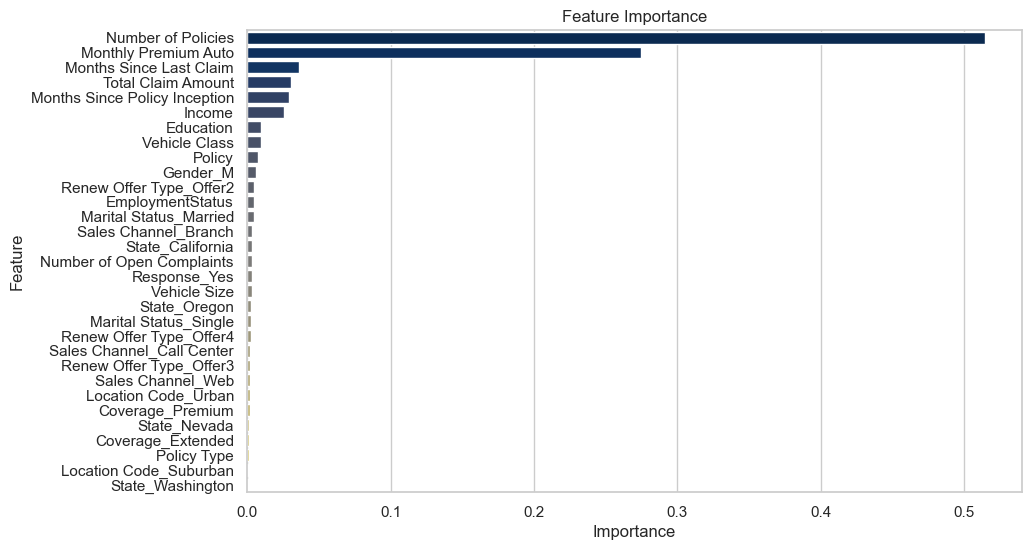

In [269]:
# Visualization 

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'cividis')
plt.title('Feature Importance')
plt.show()

# Clustering

In [270]:
# Pipeline
pipe_clustering = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), onehot_enc), 
        ('ordinal', OrdinalEncoder(categories=[education_order, employment_status_order, policy_type_order, policy_order, vehicle_class_order, vehicle_size_order]), ordinal_enc),
        ('scaler', RobustScaler(), num_cols)
    ],
    remainder='passthrough'
)
pipe_clustering

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['State', 'Response', 'Coverage', 'Gender',
                                  'Location Code', 'Marital Status',
                                  'Renew Offer Type', 'Sales Channel']),
                                ('ordinal',
                                 OrdinalEncoder(categories=[['High School or '
                                                             'Below',
                                                             'College',
                                                             'Bachelor',
                                                             'Master',
                                                             'Doctor'],
                                                            ['Unemployed',
                                                             'Medical Leave',
                                                             'Disabled',
                                                             'Retired',...
                                                             'Luxury Car',
                                                             'Sports Car',
                                                             'Luxury SUV'],
                                                            ['Small', 'Medsize',
                                                             'Large']]),
                                 ['Education', 'EmploymentStatus',
                                  'Policy Type', 'Policy', 'Vehicle Class',
                                  'Vehicle Size']),
                                ('scaler', RobustScaler(),
                                 ['Income', 'Monthly Premium Auto',
                                  'Months Since Last Claim',
                                  'Months Since Policy Inception',
                                  'Number of Open Complaints',
                                  'Number of Policies', 'Total Claim Amount',
                                  'Customer Lifetime Value'])])

In [271]:
x_cluster = pipe_clustering.fit_transform(df)
x_cluster

array([[ 0.        ,  0.        ,  0.        , ...,  2.33333333,
        -0.58264706, -0.29911219],
       [ 0.        ,  0.        ,  0.        , ..., -0.33333333,
        -0.10442303, -0.68197429],
       [ 1.        ,  0.        ,  0.        , ...,  2.33333333,
        -0.40373336, -0.22293658],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.33333333,
        -0.12182687, -0.14853359],
       [ 1.        ,  0.        ,  0.        , ...,  1.66666667,
         2.4494904 ,  0.57216269],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.02682646,  1.73611262]])

In [272]:
transformed_columns = (
    transformer.named_transformers_['onehot'].get_feature_names_out(onehot_enc).tolist() +
    transformer.named_transformers_['ordinal'].get_feature_names_out(ordinal_enc).tolist() +
    num_cols 
)
df_clustering = pd.DataFrame(x_cluster, columns=transformed_columns)
df_clustering

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Education,EmploymentStatus,Policy Type,Policy,Vehicle Class,Vehicle Size,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,0.0,1.0,0.277143,-0.536585,0.852941,-0.400000,1.0,2.333333,-0.582647,-0.299112
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.761760,-0.219512,-0.382353,0.377778,0.0,-0.333333,-0.104423,-0.681974
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,1.0,5.0,1.0,1.0,0.618849,-0.463415,-0.676471,0.355556,0.0,2.333333,-0.403733,-0.222937
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,2.0,1.0,1.0,0.335275,-0.414634,-0.617647,0.800000,0.0,-0.333333,0.028899,-0.744378
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0,0.0,0.079011,0.829268,0.735294,0.400000,0.0,0.333333,0.643942,0.594442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,2.0,1.0,-0.353266,0.731707,0.205882,0.266667,0.0,0.333333,1.057171,0.455759
6784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,1.0,0.0,0.872750,-0.536585,1.029412,0.288889,0.0,0.000000,-0.274396,0.230063
6785,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,-0.185973,-0.243902,0.205882,0.311111,0.0,0.333333,-0.121827,-0.148534
6786,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-0.550330,1.121951,-0.029412,-1.022222,0.0,1.666667,2.449490,0.572163


In [273]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [274]:
# optimize silhoutte score 
silhouette_scores=[]
number_of_cluster= range(2,11)

for i in number_of_cluster: 
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_clustering)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_clustering, labels, metric = 'euclidean'))
    

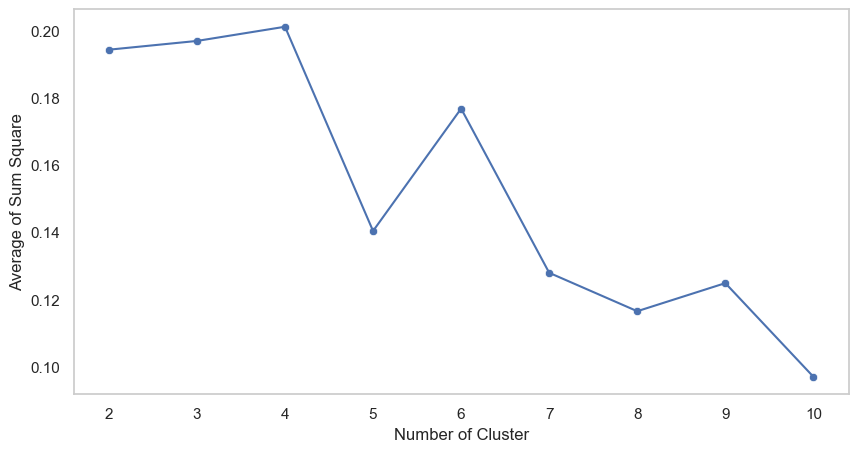

In [275]:
# visualizations 
plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1)

sns.scatterplot(x=number_of_cluster, y=silhouette_scores)
sns.lineplot(x=number_of_cluster, y=silhouette_scores)

plt.xlabel('Number of Cluster')
plt.ylabel('Average of Sum Square')
plt.grid()
plt.show()

## Applying K-Means Clustering

In [276]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_clustering)

KMeans(n_clusters=4)

In [277]:
df_clustering['cluster'] = kmeans.labels_
df_clustering

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Education,EmploymentStatus,Policy Type,Policy,Vehicle Class,Vehicle Size,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value,cluster
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,2.0,0.0,1.0,0.277143,-0.536585,0.852941,-0.400000,1.0,2.333333,-0.582647,-0.299112,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,0.761760,-0.219512,-0.382353,0.377778,0.0,-0.333333,-0.104423,-0.681974,3
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,1.0,5.0,1.0,1.0,0.618849,-0.463415,-0.676471,0.355556,0.0,2.333333,-0.403733,-0.222937,2
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,0.0,2.0,1.0,1.0,0.335275,-0.414634,-0.617647,0.800000,0.0,-0.333333,0.028899,-0.744378,3
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0,0.0,0.079011,0.829268,0.735294,0.400000,0.0,0.333333,0.643942,0.594442,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,5.0,2.0,1.0,-0.353266,0.731707,0.205882,0.266667,0.0,0.333333,1.057171,0.455759,2
6784,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,1.0,0.0,0.872750,-0.536585,1.029412,0.288889,0.0,0.000000,-0.274396,0.230063,3
6785,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,-0.185973,-0.243902,0.205882,0.311111,0.0,0.333333,-0.121827,-0.148534,1
6786,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,-0.550330,1.121951,-0.029412,-1.022222,0.0,1.666667,2.449490,0.572163,1


In [278]:
df_clustering['cluster'].value_counts()

cluster
3    3219
1    1894
2    1110
0     565
Name: count, dtype: int64

In [279]:
df_clustering.groupby('cluster')['Customer Lifetime Value'].mean()

cluster
0    3.319669
1    0.119241
2    0.259586
3    0.163680
Name: Customer Lifetime Value, dtype: float64

In [280]:
df_clustering[df_clustering['cluster'] == 2]

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Education,EmploymentStatus,Policy Type,Policy,Vehicle Class,Vehicle Size,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Customer Lifetime Value,cluster
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,4.0,1.0,5.0,1.0,1.0,0.618849,-0.463415,-0.676471,0.355556,0.0,2.333333,-0.403733,-0.222937,2
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,4.0,2.0,0.0,0.079011,0.829268,0.735294,0.400000,0.0,0.333333,0.643942,0.594442,2
12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,3.0,1.0,5.0,2.0,1.0,-0.308077,0.780488,-0.676471,0.555556,0.0,0.000000,1.609855,1.227289,2
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,0.0,0.632407,-0.414634,1.264706,-0.088889,0.0,0.666667,-0.964722,-0.187321,2
26,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,7.0,1.0,0.0,0.587720,0.731707,-0.500000,0.133333,0.0,-0.333333,0.574327,-0.348712,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,5.0,2.0,1.0,-0.113635,0.878049,1.205882,0.333333,0.0,-0.333333,1.714278,-0.404029,2
6779,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,7.0,1.0,1.0,0.543243,-0.146341,-0.676471,0.622222,0.0,-0.333333,-0.674107,-0.645971,2
6781,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,8.0,4.0,1.0,-0.225288,0.634146,-0.205882,0.200000,0.0,0.000000,0.504711,5.856674,2
6782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4.0,1.0,5.0,1.0,1.0,0.794815,-0.536585,0.676471,0.444444,0.0,-0.333333,-0.742702,-0.781479,2


In [281]:
df['cluster'] = df_clustering['cluster']
df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value,cluster
0,Washington,No,Basic,Bachelor,Employed,M,51144,Urban,Married,61,28,32,1,9,Personal Auto,Personal L3,Offer1,Agent,223.305224,Two-Door Car,Medsize,4768.955924,3
1,Arizona,No,Basic,College,Employed,M,81097,Suburban,Divorced,74,7,67,0,1,Personal Auto,Personal L1,Offer4,Agent,355.200000,Four-Door Car,Small,2912.892035,3
2,California,No,Basic,Bachelor,Employed,F,72264,Urban,Married,64,2,66,0,9,Corporate Auto,Corporate L3,Offer3,Web,272.649844,Four-Door Car,Medsize,5138.244998,2
3,Washington,No,Basic,Bachelor,Employed,F,54737,Suburban,Single,66,3,86,0,1,Personal Auto,Personal L3,Offer3,Web,391.970334,Four-Door Car,Medsize,2610.369217,3
4,California,No,Basic,College,Employed,F,38898,Suburban,Divorced,117,26,68,0,3,Corporate Auto,Corporate L2,Offer1,Agent,561.600000,SUV,Small,9100.787395,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,Oregon,No,Basic,College,Disabled,F,12180,Suburban,Single,113,17,62,0,3,Corporate Auto,Corporate L3,Offer1,Agent,675.569113,SUV,Medsize,8428.471635,2
6784,California,No,Basic,College,Employed,F,87957,Suburban,Divorced,61,31,63,0,2,Personal Auto,Personal L3,Offer3,Agent,308.321335,Four-Door Car,Small,7334.328083,3
6785,California,Yes,Basic,College,Medical Leave,M,22520,Suburban,Married,73,17,64,0,3,Personal Auto,Personal L3,Offer1,Branch,350.400000,Four-Door Car,Medsize,5498.940679,1
6786,California,No,Extended,High School or Below,Unemployed,F,0,Suburban,Single,129,13,4,0,7,Personal Auto,Personal L1,Offer1,Call Center,1059.572464,SUV,Medsize,8992.779137,1


In [282]:
df.groupby('cluster')['Customer Lifetime Value'].mean()

cluster
0    22312.317925
1     6797.076421
2     7477.447392
3     7012.511073
Name: Customer Lifetime Value, dtype: float64

In [283]:
df['cluster'].value_counts()

cluster
3    3219
1    1894
2    1110
0     565
Name: count, dtype: int64

In [287]:
df[df['cluster'] == 0]

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Customer Lifetime Value,cluster
10,Nevada,No,Extended,Bachelor,Employed,F,39411,Suburban,Married,217,4,29,2,4,Personal Auto,Personal L3,Offer3,Branch,1122.658899,Luxury Car,Medsize,16936.27147,0
25,Oregon,No,Basic,High School or Below,Employed,M,93011,Rural,Divorced,113,17,12,0,2,Personal Auto,Personal L3,Offer4,Agent,281.451042,SUV,Medsize,22643.83478,0
44,Oregon,No,Premium,Bachelor,Employed,F,46268,Urban,Married,199,34,17,1,2,Personal Auto,Personal L3,Offer1,Agent,842.000858,Sports Car,Medsize,23675.02939,0
47,California,No,Premium,College,Unemployed,F,0,Suburban,Single,190,21,35,1,7,Personal Auto,Personal L3,Offer3,Branch,1654.202174,SUV,Medsize,13045.37088,0
51,California,Yes,Extended,College,Retired,F,13663,Suburban,Single,97,1,66,0,2,Personal Auto,Personal L2,Offer1,Branch,465.600000,Four-Door Car,Small,25464.82059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6719,California,No,Basic,Bachelor,Unemployed,M,0,Suburban,Single,196,31,78,0,2,Corporate Auto,Corporate L1,Offer2,Call Center,2092.523421,Luxury Car,Medsize,19237.69976,0
6725,California,No,Extended,College,Employed,F,67117,Urban,Single,85,10,38,0,2,Personal Auto,Personal L3,Offer4,Web,329.423177,Two-Door Car,Medsize,30313.30977,0
6730,California,No,Basic,Bachelor,Retired,M,23909,Suburban,Single,119,21,86,0,2,Personal Auto,Personal L1,Offer1,Agent,571.200000,SUV,Medsize,21569.33731,0
6765,California,No,Basic,Bachelor,Unemployed,M,0,Suburban,Divorced,110,1,53,1,2,Corporate Auto,Corporate L2,Offer1,Branch,528.000000,SUV,Medsize,25030.89457,0


> `Our focus will be on the data in cluster 0 because it has the least amount of data (565 rows), but the average customer lifetime value is very high (22312.32)`

## EDA After Clustering 

# Explainable AI

# Summary